In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### axonal table

In [2]:
axonF=pd.read_csv("2023/axon_feature.txt",sep=" ",header=None)

In [3]:
axonF.columns=['name','arbor_id','region','max_density','num_nodes','total_path_length','volume','branch','d_to_soma','d_to_soma2','hub','variance_ratio']

In [6]:
axonF

,name,arbor_id,region,max_density,num_nodes,total_path_length,volume,branch,d_to_soma,d_to_soma2,hub,variance_ratio
0,18454_01067,0,VPM,4,186,10536.1209,3.373886e+09,40,2059.6696,928.164264,0,0.644444
1,18454_01067,1,VPM,8,666,29984.3407,5.076044e+08,213,3802.5354,3924.222255,0,0.494247
2,18454_00136,0,VPM,8,647,31310.2917,1.196188e+09,192,3563.4984,3499.514802,0,0.382724
3,18454_00136,1,VPM,6,544,29354.5700,1.165952e+10,119,3301.3252,3307.751358,0,0.590539
4,18463_00027,0,VPM,7,339,15277.5704,8.556409e+07,114,2574.4534,2507.715574,0,0.588763
...,...,...,...,...,...,...,...,...,...,...,...,...
3761,18867_6452_x16339_y18318,2,BS,9,179,7910.1583,2.563350e+09,46,2806.6621,3266.200347,0,0.566784
3762,17109_6501_x6997_y4287,0,AUDpo,3,787,53872.5380,4.095778e+10,46,3252.3294,3726.831121,0,0.533410
3763,236174_4129_x16214_y10304,0,FS,10,1145,73438.7697,4.169564e+10,117,1620.2286,101.063849,0,0.544653
3764,236174_4129_x16214_y10304,1,FS,6,936,62256.0945,2.999860e+10,74,3194.3083,4664.308675,0,0.517524


In [4]:
axonF2=pd.read_csv("2023/axon_feature2.txt",sep=" ",header=None)
axonF2.columns=['name','arbor_id','region','max_density','num_nodes','total_path_length','volume','branch','d_to_soma','d_to_soma2','hub','variance_ratio']

In [5]:
### Order; Local & Distal(750) 
namelist=list(axonF['name'].drop_duplicates(inplace=False))

In [6]:
arbor_order=[0 for i in range(len(axonF))]
LD_marker=[0 for i in range(len(axonF))]
for i in namelist:
    d=list(axonF[axonF['name']==i]['d_to_soma2']).copy()
    ai=list(axonF[axonF['name']==i]['arbor_id']).copy()
    newD=sorted(d)
    for j in range(len(newD)):
        org_id=d.index(newD[j])
        line_id=axonF[(axonF['name']==i)&(axonF['arbor_id']==ai[org_id])].index[0]
        arbor_order[line_id]=j
        if newD[j]>750:
            LD_marker[line_id]=1

In [7]:
### output arbor_order;LD_marker
LD_order=pd.DataFrame({'name':list(axonF['name']),'arbor_id':list(axonF['arbor_id']),'arbor_order':arbor_order,'LD':LD_marker})
LD_order.to_csv('2023/category.txt',header=True,index=None)

In [8]:
### plot for axonal
cnames=['AId','MOp','MOs','RSPv','SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un','SSs','VISp','VISl','CP',
       'LD','LGd','LP','MG','SMT','VM','VPL','VPLpc','VPM']

In [9]:
cnames.reverse()

In [8]:
table=pd.read_csv("2023/1891_type.txt",sep=" ")

In [11]:
cols=['max_density','volume','branch','d_to_soma2']

In [12]:
# table for mean 
table_mean=[]
for c in cnames:
    result=[]
    for i in range(3):
        for j in cols:
            if len(axonF[(axonF['region']==c)&(np.array(arbor_order)==i)&(np.array(LD_marker)==0)])==0:
                m1=0
            else:
                m1=np.mean(np.array(axonF[(axonF['region']==c)&(np.array(arbor_order)==i)&(np.array(LD_marker)==0)][j]))
            if len(axonF[(axonF['region']==c)&(np.array(arbor_order)==i)&(np.array(LD_marker)==1)])==0:
                m2=0
            else:
                m2=np.mean(np.array(axonF[(axonF['region']==c)&(np.array(arbor_order)==i)&(np.array(LD_marker)==1)][j]))
            result.append(m1)
            result.append(m2)
    table_mean.append(result)
table_mean=np.array(table_mean)

In [13]:
col_names=['max_density','volume','#branch','dist2soma']

In [14]:
# table for plot (scale)
table_df=[]
for i in range(3):
    for j in range(4):
        for k in range(len(cnames)):
            record0=table_mean[k,i*8+j*2]
            scaled0=(record0-np.min(table_mean[:,(i*8+j*2)]))/(np.max(table_mean[:,(i*8+j*2)])-np.min(table_mean[:,(i*8+j*2)]))
            if scaled0==0:
                t0=' '
            else:
                t0='Local'
            tmp0=[i*2,cnames[k],scaled0,t0,col_names[j]]
            record1=table_mean[k,i*8+j*2+1]
            scaled1=(record1-np.min(table_mean[:,(i*8+j*2+1)]))/(np.max(table_mean[:,(i*8+j*2+1)])-np.min(table_mean[:,(i*8+j*2+1)]))
            if scaled1==0:
                t1=' '
            else:
                t1='Distal'
            tmp1=[i*2+0.62,cnames[k],scaled1,t1,col_names[j]]
            table_df.append(tmp0)
            table_df.append(tmp1)
df_mat=pd.DataFrame(table_df)

In [15]:
palette={' ':'w','Local':'cornflowerblue','Distal':'lightcoral'}

In [16]:
df_mat.columns=['Level_0','Level_1','scale','arbor_type','feature']

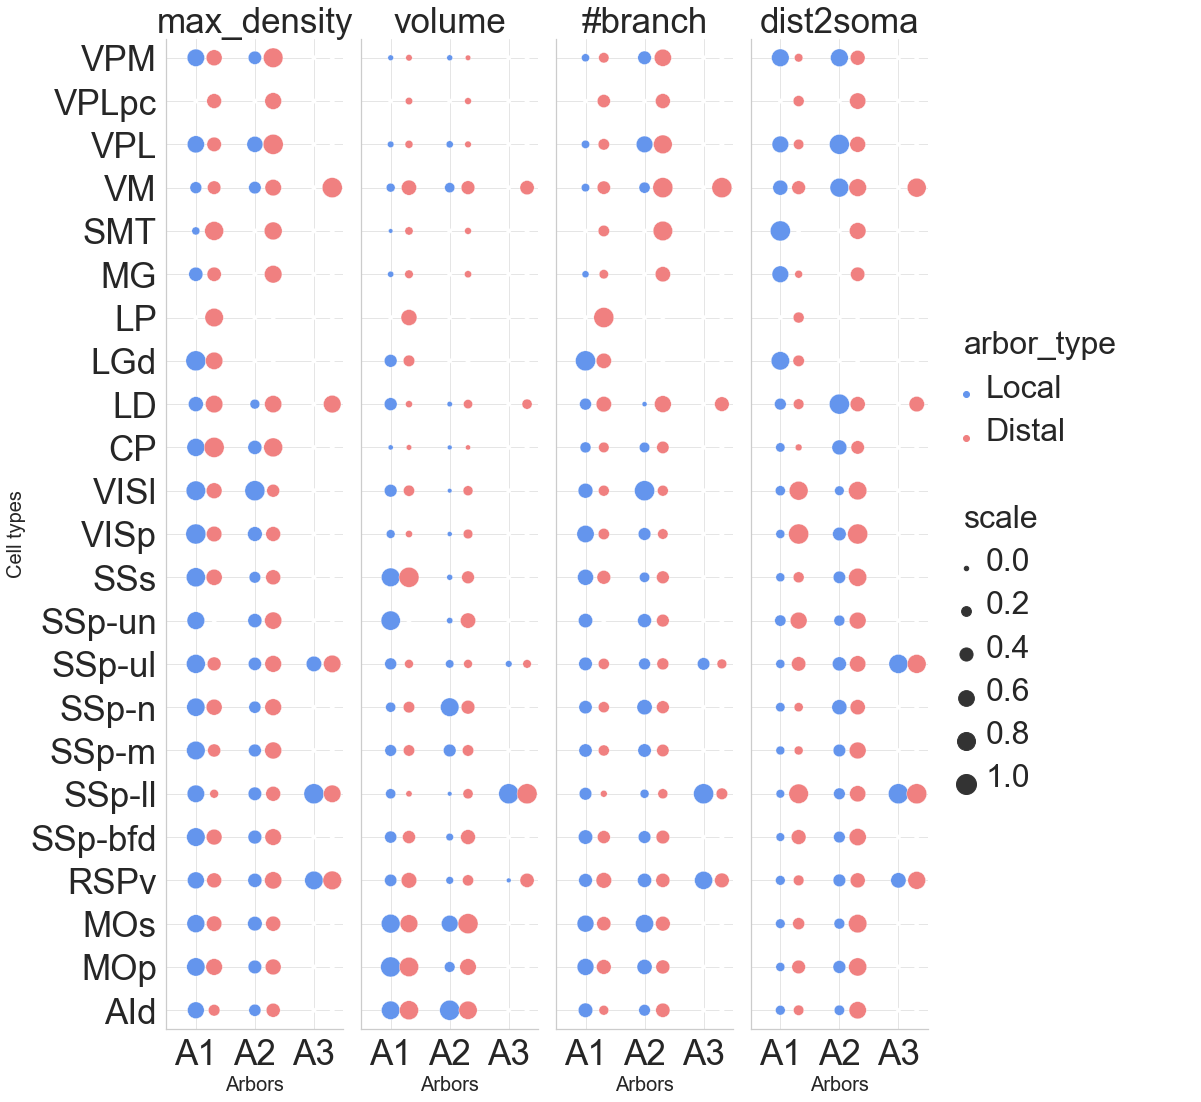

In [19]:
plt.rcParams['axes.labelsize']=20
#plt.figure(figsize=(15,13))
g=sns.relplot(data=df_mat,x="Level_0",y="Level_1",hue="arbor_type",size="scale",col="feature",palette=palette,
             edgecolor="1.",height=15,aspect=0.2,sizes=(20,400),
             )
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(wspace=0.1)
g.sharex=True
plt.setp(g._legend.get_texts(),fontsize=32)
sns.set_theme(style='whitegrid',rc={'legend.labelspacing': 1.3})
g._legend.set_bbox_to_anchor([1.2, 0.5])
g.set(xlabel="Arbors",ylabel="Cell types")
for i, ax in enumerate(g.axes[0]):
    #ax.set_xlim(-1,3)
    #ax.set_xticks(list(range(3)))
    ax.set_xlim(-1,5)
    ax.set_xticks([0,2,4])
    ax.set_xticklabels(['A1','A2','A3'])
    ax.tick_params(axis='x',labelsize=35)
    ax.tick_params(axis='y',labelsize=35)
    ax.grid("Level_0",alpha=0.5)
    ax.margins(0.02)
    ax.set_title(col_names[i],fontsize=35)
plt.savefig(f'axonal_arbor_feature.png',bbox_inches='tight',pad_inches=0.1,dpi=600)

In [33]:
### CTX
ctxnames=['CTX_ET-MOp','CTX_ET-MOs','CTX_ET-SSp-bfd','CTX_ET-SSp-m',
          'CTX_IT-MOp','CTX_IT-MOs','CTX_IT-SSp-bfd','CTX_IT-SSp-m']

In [21]:
ctxnames=['ET-MOp','ET-MOs','ET-SSp-bfd','ET-SSp-m',
          'IT-MOp','IT-MOs','IT-SSp-bfd','IT-SSp-m']

In [22]:
ctxnames.reverse()

In [9]:
ptype=[]
for i in range(len(axonF)):
    name=axonF['name'][i]
    line=table[table['Name']==name]
    line=line.reset_index(drop=True)
    p=line['Subclass_or_type'][0]
    ptype.append(p)

In [10]:
ptype=np.array(ptype)

In [25]:
p_cnames=['SSp-m','SSp-bfd','MOs','MOp']
p_ptypes=['CTX_IT','CTX_ET']

In [26]:
# table for mean (CTX)
ctx_mean=[]
for p in p_ptypes:
    for c in p_cnames:
        result=[]
        for i in range(2):
            for j in cols:
                m1=np.mean(np.array(axonF[(axonF['region']==c)&(np.array(ptype)==p)&(np.array(LD_marker)==0)&(np.array(arbor_order)==i)][j]))
                m2=np.mean(np.array(axonF[(axonF['region']==c)&(np.array(arbor_order)==i)&(np.array(LD_marker)==1)&(np.array(ptype)==p)][j]))
                result.append(m1)
                result.append(m2)
        ctx_mean.append(result)
ctx_mean=np.array(ctx_mean)

In [27]:
# table for plot (scale)
table_ctx=[]
for i in range(2):
    for j in range(4):
        for k in range(8):
            record0=ctx_mean[k,i*8+j*2]
            scaled0=(record0-np.min(ctx_mean[:,(i*8+j*2)]))/(np.max(ctx_mean[:,(i*8+j*2)])-np.min(ctx_mean[:,(i*8+j*2)]))
            if scaled0==0:
                t0=' '
            else:
                t0='Local'
            tmp0=[i*1.4,ctxnames[k],scaled0,t0,col_names[j]]
            record1=ctx_mean[k,i*8+j*2+1]
            scaled1=(record1-np.min(ctx_mean[:,(i*8+j*2+1)]))/(np.max(ctx_mean[:,(i*8+j*2+1)])-np.min(ctx_mean[:,(i*8+j*2+1)]))
            if scaled1==0:
                t1=' '
            else:
                t1='Distal'
            tmp1=[i*1.4+0.53,ctxnames[k],scaled1,t1,col_names[j]]
            table_ctx.append(tmp0)
            table_ctx.append(tmp1)
ctx_mat=pd.DataFrame(table_ctx)

In [28]:
ctx_mat.columns=['Level_0','Level_1','scale','arbor_type','feature']

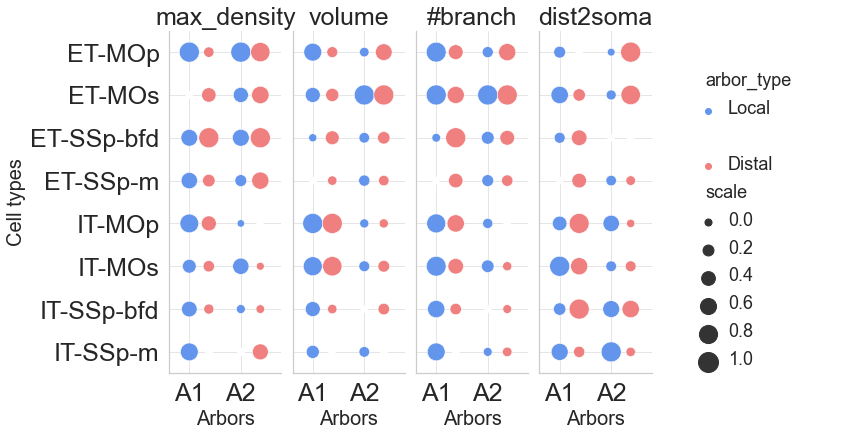

In [30]:
plt.rcParams['axes.labelsize']=20
g=sns.relplot(data=ctx_mat,x="Level_0",y="Level_1",hue="arbor_type",size="scale",col="feature",palette=palette,
             edgecolor="1.",height=6,aspect=0.35,sizes=(50,400),legend='brief',
             )
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(wspace=0.1)
g.sharex=True
plt.setp(g._legend.get_texts(),fontsize=18)
g.set(xlabel="Arbors",ylabel="Cell types")
g._legend.set_bbox_to_anchor([1.18, 0.5])
sns.set_theme(style='whitegrid', rc={'legend.labelspacing': 0.9})
for i, ax in enumerate(g.axes[0]):
    ax.set_xlim(-0.55,2.5)
    ax.set_xticks([0,1.4])
    ax.set_ylim(-0.5,7.5)
    ax.set_xticklabels(['A1','A2'],fontsize=25)
    ax.tick_params(axis='x',labelsize=25)
    ax.tick_params(axis='y',labelsize=25)
    ax.grid("Level_0",alpha=0.5)
    ax.margins(0.02)
    ax.set_title(col_names[i],fontsize=25)  
plt.savefig(f'axonal_arbor_feature_CTX.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [31]:
basalF=pd.read_csv("2023/basal_feature.txt",sep=" ",header=None)
apicalF=pd.read_csv("2023/apical_feature.txt",sep=" ",header=None)

In [32]:
basalF.columns=['name','region','max_density','nodes','p_length','volume','branch','d_to_soma','d_to_soma2','hub','variance_ratio']
apicalF.columns=['name','region','max_density','nodes','p_length','volume','branch','d_to_soma','d_to_soma2','hub','variance_ratio']

In [33]:
a_ptype=[]
b_ptype=[]
a_ctype=[]
b_ctype=[]
a_ltype=[]
b_ltype=[]
for i in range(len(basalF)):
    name=basalF['name'][i]
    line=table[table['Name']==name]
    line=line.reset_index(drop=True)
    p=line['Subclass_or_type'][0]
    b_ptype.append(p)
    b_ctype.append(line['Soma_region'][0])
    b_ltype.append(line['Cortical_layer'][0])
for i in range(len(apicalF)):
    name=apicalF['name'][i]
    line=table[table['Name']==name]
    line=line.reset_index(drop=True)
    p=line['Subclass_or_type'][0]
    a_ptype.append(p)
    a_ctype.append(line['Soma_region'][0])
    a_ltype.append(line['Cortical_layer'][0])

In [34]:
cols2=['volume','branch']

In [35]:
# table for mean (CTX+dendrite)
D_mean=[]
for p in p_ptypes:
    for c in p_cnames:
        result=[]
        for j in cols2:
            m1=np.mean(np.array(basalF[(basalF['region']==c)&(np.array(b_ptype)==p)][j]))
            m2=np.mean(np.array(apicalF[(apicalF['region']==c)&(np.array(a_ptype)==p)][j]))
            result.append(m1)
            result.append(m2)
        D_mean.append(result)
D_mean=np.array(D_mean)

In [36]:
# table for plot (scale)
table_D=[]
for i in range(8):
    for j in range(2):#Feature
        record0=D_mean[i,j*2]
        scaled0=(record0-np.min(D_mean[:,j*2]))/(np.max(D_mean[:,j*2])-np.min(D_mean[:,j*2]))
        tmp0=[0,ctxnames[i],scaled0,'basal',col_names[j+1]]
        record1=D_mean[i,j*2+1]
        scaled1=(record1-np.min(D_mean[:,(j*2+1)]))/(np.max(D_mean[:,(j*2+1)])-np.min(D_mean[:,(j*2+1)]))
        tmp1=[1,ctxnames[i],scaled1,'apical',col_names[j+1]]
        table_D.append(tmp0)
        table_D.append(tmp1)
D_mat=pd.DataFrame(table_D)

In [37]:
D_mat.columns=['Level_0','Level_1','scale','arbor_type','feature']

In [38]:
palette2={'basal':'#78d1b6','apical':'plum'}

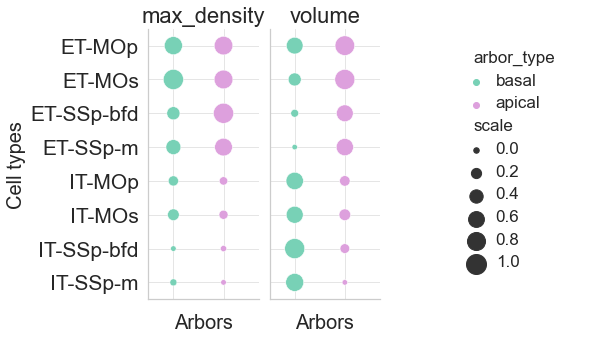

In [42]:
plt.rcParams['axes.labelsize']=20
g=sns.relplot(data=D_mat,x="Level_0",y="Level_1",hue="arbor_type",size="scale",col="feature",palette=palette2,
             edgecolor="1.",height=5,aspect=0.5,sizes=(30,400),legend='brief',
             )
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(wspace=0.1)
g.sharex=True
plt.setp(g._legend.get_texts(),fontsize=17)
g.set(xlabel="Arbors",ylabel="Cell types")
sns.set_theme(style='whitegrid', rc={'legend.labelspacing': 0.7})
g._legend.set_bbox_to_anchor([1.3, 0.5])
for i, ax in enumerate(g.axes[0]):
    #ax.set_xlim(-1,3)
    #ax.set_xticks(list(range(3)))
    ax.set_xlim(-0.5,1.7)
    ax.set_xticks([0,1])
    ax.set_ylim(-0.5,7.5)
    ax.tick_params(axis='x',colors=(0,0,0,0),labelsize=0)
    ax.tick_params(axis='y',labelsize=21)
    ax.grid("Level_0",alpha=0.5)
    ax.margins(0.02)
    ax.set_title(col_names[i],fontsize=22)
plt.savefig(f'dendrite_arbor_feature_CTX.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [11]:
ctype=axonF['region']

In [12]:
ctype=np.array(ctype)

In [13]:
LD_marker=np.array(LD_marker)

In [96]:
cnames2=['AId','MOp','MOs','RSPv','SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un','SSs','VISp','VISl','CP',
       'LD','LGd','LP','MG','SMT','VM','VPL','VPLpc','VPM']

In [102]:
## Local vs Distal
LD_percent=[]
for i in cnames2:
    result=[]
    selected=LD_marker[ctype==str(i)]
    total=len(selected)
    D=np.sum(selected)
    L=total-D
    result.append(round(L/total*100,2))
    result.append(round(D/total*100,2))
    LD_percent.append(result)

In [103]:
LD_percent=np.array(LD_percent)

In [105]:
marker=['Local','Distal']
colors=['cornflowerblue','lightcoral']
LD_percent_cum = LD_percent.cumsum(axis=1)

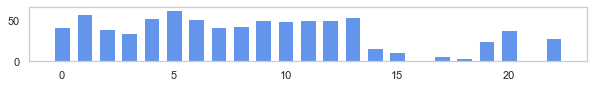

In [122]:
plt.figure(figsize=(10,1))
Y=np.arange(len(LD_percent_cum))
plt.bar(Y, LD_percent_cum[:,0], width=0.7, color='cornflowerblue')
plt.grid(None)
plt.savefig(f'axonal_LD_percentage.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 12))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, 100)
for i, (colname, color) in enumerate(zip(marker, colors)):
    widths = LD_percent[:, i]
    starts = LD_percent_cum[:, i] - widths
    rects = ax.barh(cnames2, widths, left=starts, height=0.8,label=colname, color=color)
f
    text_color = 'black'
    ax.bar_label(rects, label_type='center', color=text_color,fontsize=12)
ax.legend(ncol=len(marker), bbox_to_anchor=(0.5, 1),loc='lower center', fontsize=12)
plt.rcParams['ytick.labelsize']=15
#plt.savefig(f'axonal_LD_percentage.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [10]:
### projection analysis
th_core=pd.read_csv("2023/TH_core_R.txt",sep=" ",header=None)
th_m=pd.read_csv("2023/TH_matrix_R.txt",sep=" ",header=None)

In [14]:
## rough cell type
## BS
TH=['AD','AM','AV','CL','CM','IAD','LD','LGd','LHA','LP','MD','MG','MM','PCN','PF','PIL','PO','POL','PR','PVT',
   'PoT','RE','RT','SGN','SMT','TH','VAL','VM','LGv','IMD','PT',
   'VPL','VPLpc','VPM','VPMpc']
CTX=['ACAd','ACAv','AId','AIp','AIv','AON','AON','AUDd','AUDpo','AUDv','BLA','BMA','CA1','CA3','CLA','COAp','HPF','DG',
    'ECT','ENTl','ENTm','EPd','FRP','GU','IG','ILA','MOB','MOp','MOs','ORBl','ORBm','ORBvl','PIR','PL','POST','PRoS',
    'RSPagl','RSPd','RSPv','SSs','SUB','TEa','TR','VISC','VISa','VISal','VISam','VISl','VISli','VISp','VISpm',
    'VISpor','VISrl','VISpl','PAR','SSp','SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-tr','SSp-ul','SSp-un','AOB','APr',
    'DP','AUDp','TT','ProS']
CNU=['ACB','BST','CEA','CP','FS','GPe','GPi','LSr','LSv','OT','PAL','PAR','PRE','SI','MEA','MS']
HY=['AHN','DMH','HY','PH','PSTN','PVH','PVi','PeF','SBPV','TU','VMH','ZI']
CB=['CENT','COPY','CUL','DEC','FL','FN','FOTU','NOD','PFL','AN','PRM','PYR','SIM','SIM']
MB=['DR','IC','MB','MRN','MV','MY','PAG','RN','SNc','SCm','APN','PPN','RR','SNr','SAG','SCs','VTN','NOT','NB','AT',
   'CUN','PPT','MPT','VTA','CLI']
HB=['IRN','LRN','MDRNd','MDRNv','P','PARN','PB','PG','PGRNl','PRNc','PRNr','PSV','SPIV','SPVC','SPVO','SUV','TRN',
   'V','VCO','NLL','CS','RPO','PCG','LDT','PCG','DTN']

In [15]:
th_core.columns=['name','p_region']
th_m.columns=['name','p_region']

In [18]:
th_coreL=pd.read_csv("2023/TH_core_RL.txt",sep=" ",header=None)
th_mL=pd.read_csv("2023/TH_matrix_RL.txt",sep=" ",header=None)
th_coreL.columns=['name','length']
th_mL.columns=['name','length']

In [23]:
# TH projection table
th_core_count=[]
th_core_length=[]
for i in range(len(th_core)):
    rs=th_core['p_region'][i]
    rslist=str(rs).split(",")
    ls=th_coreL['length'][i]
    lslist=str(ls).split(",")
    n_TH=0
    n_CTX=0
    n_CNU=0
    n_HY=0
    n_CB=0
    n_MB=0
    n_HB=0
    l_TH=0
    l_CTX=0
    l_CNU=0
    l_HY=0
    l_CB=0
    l_MB=0
    l_HB=0
    if str(rs) == "nan":
        result1=[n_TH,n_CTX,n_CNU,n_HY,n_CB,n_MB,n_HB]
        result2=[l_TH,l_CTX,l_CNU,l_HY,l_CB,l_MB,l_HB]
        th_core_count.append(result1)
        th_core_length.append(result2)
        continue
    else:
        for j in range(len(rslist)):
            if rslist[j] in TH:
                n_TH+=1
                l_TH+=float(lslist[j])
            if rslist[j] in CTX:
                n_CTX+=1
                l_CTX+=float(lslist[j])
            if rslist[j] in CNU:
                n_CNU+=1
                l_CNU+=float(lslist[j])
            if rslist[j] in HY:
                n_HY+=1
                l_HY+=float(lslist[j])
            if rslist[j] in CB:
                n_CB+=1
                l_CB+=float(lslist[j])
            if rslist[j] in MB:
                n_MB+=1
                l_MB+=float(lslist[j])
            if rslist[j] in HB:
                n_HB+=1
                l_HB+=float(lslist[j])
        l_TH=round(l_TH,2)
        l_CTX=round(l_CTX,2)
        l_CNU=round(l_CNU,2)
        l_HY=round(l_HY,2)
        l_CB=round(l_CB,2)
        l_MB=round(l_MB,2)
        l_HB=round(l_HB,2)
        result1=[n_TH,n_CTX,n_CNU,n_HY,n_CB,n_MB,n_HB]
        result2=[l_TH,l_CTX,l_CNU,l_HY,l_CB,l_MB,l_HB]
        th_core_count.append(result1)
        th_core_length.append(result2)

In [24]:
th_m_count=[]
th_m_length=[]
for i in range(len(th_m)):
    rs=th_m['p_region'][i]
    rslist=str(rs).split(",")
    ls=th_mL['length'][i]
    lslist=str(ls).split(",")
    n_TH=0
    n_CTX=0
    n_CNU=0
    n_HY=0
    n_CB=0
    n_MB=0
    n_HB=0
    l_TH=0
    l_CTX=0
    l_CNU=0
    l_HY=0
    l_CB=0
    l_MB=0
    l_HB=0
    if str(rs) == "nan":
        result1=[n_TH,n_CTX,n_CNU,n_HY,n_CB,n_MB,n_HB]
        th_m_count.append(result1)
        result2=[l_TH,l_CTX,l_CNU,l_HY,l_CB,l_MB,l_HB]
        th_m_length.append(result2)
        continue
    else:
        for j in range(len(rslist)):
            if rslist[j] in TH:
                n_TH+=1
                l_TH+=float(lslist[j])
            if rslist[j] in CTX:
                n_CTX+=1
                l_CTX+=float(lslist[j])
            if rslist[j] in CNU:
                n_CNU+=1
                l_CNU+=float(lslist[j])
            if rslist[j] in HY:
                n_HY+=1
                l_HY+=float(lslist[j])
            if rslist[j] in CB:
                n_CB+=1
                l_CB+=float(lslist[j])
            if rslist[j] in MB:
                n_MB+=1
                l_MB+=float(lslist[j])
            if rslist[j] in HB:
                n_HB+=1
                l_HB+=float(lslist[j])
                l_HB+=float(lslist[j])
        l_TH=round(l_TH,2)
        l_CTX=round(l_CTX,2)
        l_CNU=round(l_CNU,2)
        l_HY=round(l_HY,2)
        l_CB=round(l_CB,2)
        l_MB=round(l_MB,2)
        l_HB=round(l_HB,2)
        result1=[n_TH,n_CTX,n_CNU,n_HY,n_CB,n_MB,n_HB]
        th_m_count.append(result1)
        result2=[l_TH,l_CTX,l_CNU,l_HY,l_CB,l_MB,l_HB]
        th_m_length.append(result2)

In [33]:
th_m_count=np.array(th_m_count)
th_core_count=np.array(th_core_count)
m_count_P=np.sum(th_m_count,axis=0)/max(np.sum(th_m_count,axis=0))
core_count_P=np.sum(th_core_count,axis=0)/max(np.sum(th_core_count,axis=0))
TH_rough_table=pd.DataFrame(np.array([core_count_P,m_count_P]))
TH_rough_table.columns=['TH','CTX','CNU','HY','CB','MB','HB']

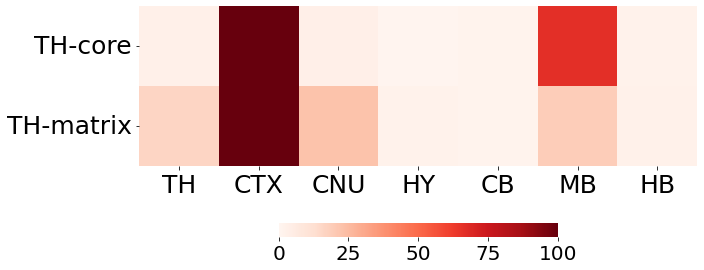

In [38]:
plt.figure(figsize=(10,7))
ax=sns.heatmap(TH_rough_table*100,square=True,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.5})
#ax=sns.heatmap(TH_R_table*100,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.1})
#ax=sns.heatmap(TH_rough_table,mask=TH_rough_table>0,cmap='gist_gray_r',vmin=-1,vmax=20,square=True)
ax.set_yticklabels(['TH-core','TH-matrix'],rotation=0)
#ax.set_xticklabels(regionTH_sorted)
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.savefig(f'TH_count_R.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [42]:
th_m_length=np.array(th_m_length)
th_core_length=np.array(th_core_length)
m_length_P=(np.sum(th_m_length,axis=0)/len(th_m_length))/max(np.sum(th_m_length,axis=0)/len(th_m_length))
core_length_P=(np.sum(th_core_length,axis=0)/len(th_core_length))/max(np.sum(th_core_length,axis=0)/len(th_core_length))
TH_L_table=pd.DataFrame(np.array([core_length_P,m_length_P]))
TH_L_table.columns=['TH','CTX','CNU','HY','CB','MB','HB']

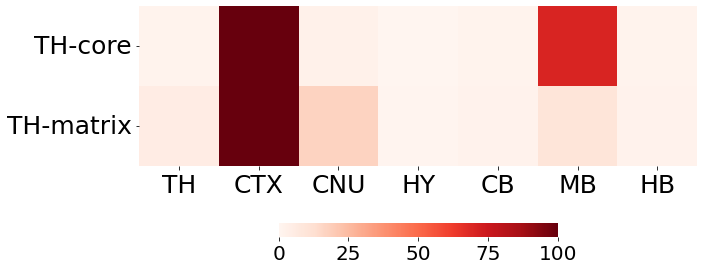

In [43]:
plt.figure(figsize=(10,7))
ax=sns.heatmap(TH_L_table*100,square=True,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.5})
#ax=sns.heatmap(TH_R_table*100,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.1})
#ax=sns.heatmap(TH_L_table,mask=TH_L_table>0,cmap='gist_gray_r',vmin=-1,vmax=20,square=True)
ax.set_yticklabels(['TH-core','TH-matrix'],rotation=0)
#ax.set_xticklabels(regionTH_sorted)
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
#plt.savefig(f'TH_count_R.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [16]:
regions_involved_TH=[]
tmp1={}
for i in range(len(th_core)):
    r=str(th_core['p_region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j not in regions_involved_TH:
                regions_involved_TH.append(j)
            if j not in tmp1:
                tmp1[j]=1
            else:
                tmp1[j]+=1
tmp2={}
for i in range(len(th_m)):
    r=str(th_m['p_region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j not in regions_involved_TH:
                regions_involved_TH.append(j)
            if j not in tmp2:
                tmp2[j]=1
            else:
                tmp2[j]+=1

In [17]:
regions_involved_TH.remove('fiber_tracts')

In [184]:
## 投射脑区
th=[]
ctx=[]
cnu=[]
mb=[]
hb=[]
cb=[]
hy=[]
for i in regions_involved_TH:
    if i in TH:
        th.append(i)
    elif i in CTX:
        ctx.append(i)
    elif i in MB:
        mb.append(i)
    elif i in HB:
        hb.append(i)
    elif i in CB:
        cb.append(i)
    elif i in HY:
        hy.append(i)
    elif i in CNU:
        cnu.append(i)

In [185]:
regionTH_sorted=th+ctx+cnu+mb+hb+cb+hy

In [48]:
### region statistics
th_core_RI=[0 for i in range(len(regionTH_sorted))]
th_m_RI=[0 for i in range(len(regionTH_sorted))]
N=0
for i in regionTH_sorted:
    if i in tmp1:
        th_core_RI[N]=tmp1[i]
    if i in tmp2:
        th_m_RI[N]=tmp2[i]
    N+=1

In [162]:
th_core_RI=np.array(th_core_RI)
th_m_RI=np.array(th_m_RI)
th_core_RI=th_core_RI/max(th_core_RI)
th_m_RI=th_m_RI/max(th_m_RI)

In [163]:
TH_R_table=pd.DataFrame(np.array([th_core_RI,th_m_RI],dtype=float))
TH_R_table.columns=regionTH_sorted

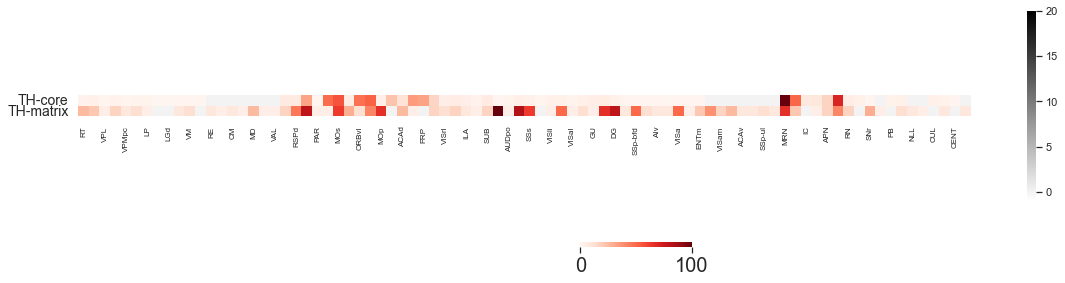

In [169]:
plt.figure(figsize=(20,5))
ax=sns.heatmap(TH_R_table*100,square=True,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.1})
#ax=sns.heatmap(TH_R_table*100,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.1})
ax=sns.heatmap(TH_R_table,mask=TH_R_table>0,cmap='gist_gray_r',vmin=-1,vmax=20,square=True)
ax.set_yticklabels(['TH-core','TH-matrix'],rotation=0)
#ax.set_xticklabels(regionTH_sorted)
plt.xticks(fontsize=8,rotation=90)
plt.yticks(fontsize=14)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
#plt.savefig(f'LP_LGd_R.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [ ]:
regions_involved_TH=[]
tmp1={}
for i in range(len(th_core)):
    r=str(th_core['p_region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j not in regions_involved_TH:
                regions_involved_TH.append(j)
            if j not in tmp1:
                tmp1[j]=1
            else:
                tmp1[j]+=1
tmp2={}
for i in range(len(th_m)):
    r=str(th_m['p_region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j not in regions_involved_TH:
                regions_involved_TH.append(j)
            if j not in tmp2:
                tmp2[j]=1
            else:
                tmp2[j]+=1

In [419]:
L_th_subR=['RE','LP','PO','VM','LD','MG','SMT','VPLpc','VAL','VPM','LGd','VPL','VPMpc']
L_th_subR=np.array(L_th_subR)
th_subR_table=[]
for i in range(len(L)):
    tmp=[]
    for j in range(len(regionTH_sorted)):
        tmp.append(0)
    th_subR_table.append(tmp)
th_subR_table=np.array(th_subR_table)
for i in range(len(th_core)):
    r=str(th_core['p_region'][i])
    c=th_core_ctype[i]
    if c not in L_th_subR:
        continue
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j=="fiber_tracts":
                continue
            cid=regionTH_sorted.index(j)
            rid=np.where(L_th_subR==c)[0][0]
            th_subR_table[rid,cid]=th_subR_table[rid,cid]+1
for i in range(len(th_m)):
    r=str(th_m['p_region'][i])
    c=th_m_ctype[i]
    if c not in L_th_subR:
        continue
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j=="fiber_tracts":
                continue
            cid=regionTH_sorted.index(j)
            rid=np.where(L_th_subR==c)[0][0]
            th_subR_table[rid,cid]=th_subR_table[rid,cid]+1

In [420]:
th_subR_table2=[]
for i in range(len(th_subR_table)):
    th_subR_table2.append(th_subR_table[i,:]/max(th_subR_table[i,:]))

In [421]:
th_subR_table2=pd.DataFrame(np.array(th_subR_table2).T)
#th_subR_table2.columns=regionTH_sorted
th_subR_table2.columns=L_th_subR

In [422]:
ylabel_TH=[]
for i in range(len(regionTH_sorted)):
    if i%2==0:
        ylabel_TH.append(regionTH_sorted[i])

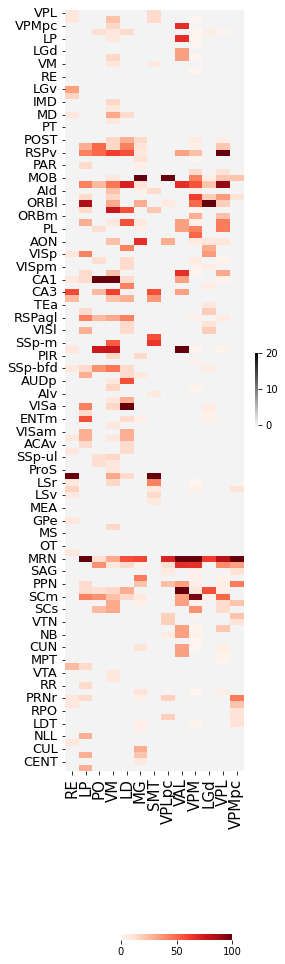

In [424]:
plt.figure(figsize=(4,20))
ax=sns.heatmap(th_subR_table2*100,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.5})
#ax=sns.heatmap(th_subR_table,square=True,vmin=0,vmax=200,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.1})
ax=sns.heatmap(th_subR_table2,mask=th_subR_table2>0,cmap='gist_gray_r',vmin=-1,vmax=20,cbar_kws={"shrink":0.1})

plt.ylim(122,2,0)
ax.set_yticklabels(ylabel_TH,rotation=0)
#ax.set_xticklabels(regionTH_sorted)

plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=13)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.savefig(f'TH_subR.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [51]:
th_m_count=np.array(th_m_count)
th_m_length=np.array(th_m_length)
th_core_count=np.array(th_core_count)
th_core_length=np.array(th_core_length)

In [52]:
tmp1=np.vstack((th_core_count,th_m_count))
tmp2=np.vstack((th_core_length,th_m_length))
TH_table=np.hstack((tmp1,tmp2))
TH_table=pd.DataFrame(TH_table)
TH_table.columns=['TH','CTX','CNU','HY','CB','MB','HB','TH_p','CTX_p','CNU_p','HY_p','CB_p','MB_p','HB_p']

In [18]:
TH_label=[]
for i in range(len(th_core_count)):
    TH_label.append(0)
for i in range(len(th_m_count)):
    TH_label.append(1)

NameError: name 'th_core_count' is not defined

In [19]:
# ctype count
th_core_ctype=[]
for i in range(len(th_core)):
    name=th_core['name'][i]
    name=name[:-2]
    line=table[table['Name']==name]
    line=line.reset_index(drop=True)
    r=line['Soma_region'][0]
    th_core_ctype.append(r)

In [20]:
# ctype count
th_m_ctype=[]
for i in range(len(th_m)):
    name=th_m['name'][i]
    name=name[:-2]
    line=table[table['Name']==name]
    line=line.reset_index(drop=True)
    r=line['Soma_region'][0]
    th_m_ctype.append(r)

In [21]:
# clustering Guassian Mixture
from sklearn.mixture import GaussianMixture
from numpy import unique
import sklearn
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.decomposition import PCA

In [25]:
scaled_TH = StandardScaler().fit_transform(TH_table)

In [413]:
scaled_TH = StandardScaler().fit_transform(TH_table[['TH','CTX','CNU','MB']])

In [26]:
### TH basal sholl analysis
th_core_basal_sholl=[0.817,14.74,36.313,44.533,42.875,34.931,23.089,12.061,5.022,1.929,0.702,0.249,0.099,
                    0.05,0.027,0.022,0.011,0.003,0.002,0.002,0]
th_matrix_basal_sholl=[0.508,10.302,27.238,41.968,49.524,49.302,43.27,33.937,23.889,15.54,9.746,6.063,3.286,
                      1.841,0.952,0.619,0.476,0.429,0.286,0.143,0.032]

In [81]:
import altair as alt

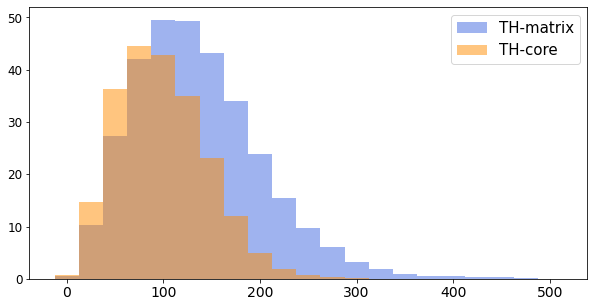

In [143]:
plt.figure(figsize=(10,5))
X=[100*i for i in range(6)]
x=[0.25*i for i in range(21)]
plt.bar(x, th_matrix_basal_sholl, width=0.25,alpha=0.5,color='royalblue',align="center",label="TH-matrix")
plt.bar(x, th_core_basal_sholl, width=0.25,alpha=0.5,color='darkorange',align='center',label="TH-core")
plt.xticks([1*i for i in range(6)],X,fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)
plt.savefig(f'TH_basal.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [89]:
X=[20*i for i in range(21)]
x_smooth = np.linspace(0,420, 400)
y1 = make_interp_spline(X, th_core_basal_sholl)(x_smooth)
y2 = make_interp_spline(X, th_matrix_basal_sholl)(x_smooth)

In [15]:
from scipy import stats
import random

In [23]:
th_core_ctype=np.array(th_core_ctype)
th_m_ctype=np.array(th_m_ctype)

In [25]:
## according to ctypes
ur_th_core=np.unique(th_core_ctype)
ur_th_m=np.unique(th_m_ctype)

In [68]:
th_core_count_R=th_core_stat
for i in ur_th_core:
    tmp=th_core_count[th_core_ctype==i]
    tmp3=th_core_length[th_core_ctype==i]
    tmp2=np.hstack((np.mean(tmp,axis=0)/max(np.mean(tmp,axis=0)),np.std(tmp,axis=0)/max(np.mean(tmp,axis=0)),np.mean(tmp3,axis=0)/max(np.mean(tmp3,axis=0)),np.std(tmp3,axis=0)/max(np.mean(tmp3,axis=0))))
    th_core_count_R=np.vstack((th_core_count_R,tmp2))

In [69]:
th_m_count_R=th_m_stat
for i in ur_th_m:
    tmp=th_m_count[th_m_ctype==i]
    tmp3=th_m_length[th_m_ctype==i]
    #tmp2=np.hstack((np.mean(tmp,axis=0),np.std(tmp,axis=0),np.mean(tmp3,axis=0),np.std(tmp3,axis=0)))
    tmp2=np.hstack((np.mean(tmp,axis=0)/max(np.mean(tmp,axis=0)),np.std(tmp,axis=0)/max(np.mean(tmp,axis=0)),np.mean(tmp3,axis=0)/max(np.mean(tmp3,axis=0)),np.std(tmp3,axis=0)/max(np.mean(tmp3,axis=0))))
    th_m_count_R=np.vstack((th_m_count_R,tmp2))

In [70]:
th_m_count_R=th_m_count_R[1:,]
th_core_count_R=th_core_count_R[1:,]

In [59]:
th_core_stat=np.hstack((np.mean(th_core_count,axis=0),np.std(th_core_count,axis=0),np.mean(th_core_length,axis=0),np.std(th_core_length,axis=0)))
th_m_stat=np.hstack((np.mean(th_m_count,axis=0),np.std(th_m_count,axis=0),np.mean(th_m_length,axis=0),np.std(th_m_length,axis=0)))

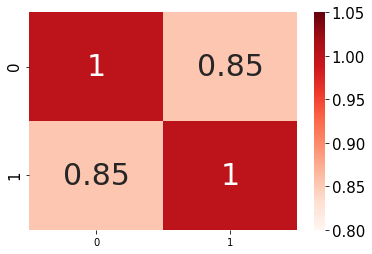

In [978]:
# correlation matrix
sns.heatmap(np.corrcoef(np.vstack((th_core_stat,th_m_stat))),vmin=0.8,vmax=1.05,cmap='Reds',annot=True,annot_kws={"fontsize":30})
plt.savefig(f'TH_corr.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [594]:
corr_TH=np.corrcoef(np.vstack((th_core_count_R,th_m_count_R)))

In [233]:
from sklearn.cluster import KMeans

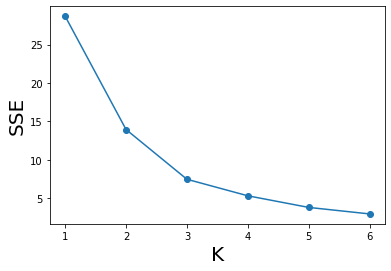

In [604]:
SSE = []
for k in range(1, 7):
    cn = KMeans(n_clusters=k)
    cn.fit(corr_TH)
    SSE.append(cn.inertia_)
plt.figure(3)
X = range(1, 7)
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(X, SSE, 'o-')
plt.show()

In [613]:
model = KMeans(n_clusters=3, init="random",
               max_iter=200, tol=1e-04)
model = model.fit(np.vstack((th_core_count_R,th_m_count_R)))
clustering_labels=model.labels_

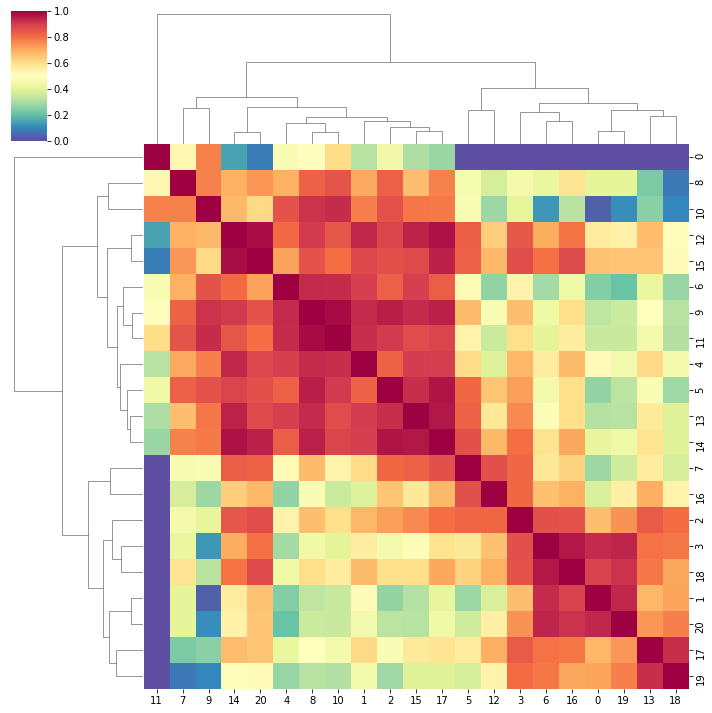

In [610]:
sns.clustermap(corr_TH2,cmap='Spectral_r',vmin=0,vmax=1)

In [71]:
## 层次聚类
import scipy.cluster.hierarchy as sch

In [26]:
L=list(ur_th_core)+list(ur_th_m)
L.remove('SGN')

In [27]:
### IAD:4, PVT:6,CM:3,PoT:2,MD,AM
L.remove('IAD')
L.remove('PVT')
L.remove('CM')
L.remove('PoT')
L.remove('AM')
L.remove('LD')
L.remove('MD')
#L.remove('LD')
L.remove('MD')

In [74]:
L

['LD',
 'LGd',
 'MD',
 'MG',
 'SMT',
 'VAL',
 'VPL',
 'VPLpc',
 'VPM',
 'VPMpc',
 'LD',
 'LP',
 'MD',
 'PO',
 'RE',
 'VM']

In [35]:
axonF_th_core=axonF[ptype=='TH_core'][['max_density','volume','branch','d_to_soma2']]
axonF_th_m=axonF[ptype=='TH_matrix'][['max_density','volume','branch','d_to_soma2']]

In [36]:
axonF_th_core=axonF_th_core.reset_index(drop=True)
axonF_th_m=axonF_th_m.reset_index(drop=True)

In [352]:
axonF_th_core_mean=[]
for i in ur_th_core:
    if (i=='SGN')|(i=='PoT')|(i=='LD')|(i=='MD')|(i=='AM'):
    #if (i=='SGN')|(i=='PoT')|(i=='AM'):
        continue
    axonF_th_core_mean.append(list(axonF_th_core[th_core_ctype==i].mean())+list(axonF_th_core[th_core_ctype==i].std()))

In [949]:
ur_th_core

array(['AM', 'LD', 'LGd', 'MD', 'MG', 'PoT', 'SGN', 'SMT', 'VAL', 'VPL',
       'VPLpc', 'VPM', 'VPMpc'], dtype='<U5')

In [353]:
axonF_th_m_mean=[]
for i in ur_th_m:
    if (i=='IAD')|(i=='PVT')|(i=='CM')|(i=='MD'):
    #if (i=='IAD')|(i=='PVT')|(i=='CM'):
        continue
    axonF_th_m_mean.append(list(axonF_th_m[th_m_ctype==i].mean())+list(axonF_th_m[th_m_ctype==i].std()))

In [354]:
axonF_th_core_mean=np.array(axonF_th_core_mean)
axonF_th_m_mean=np.array(axonF_th_m_mean)

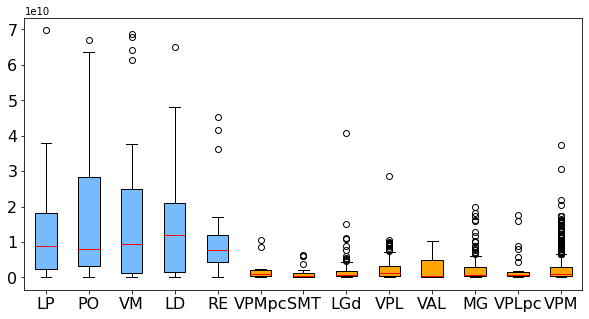

In [427]:
### 主要特征显示
data=[]
N=0
for i in stype_th_all_ordered:
    if N<5:
        x=axonF_th_m[th_m_ctype==i]['volume']
    else:
        x=axonF_th_core[th_core_ctype==i]['volume']
    data.append(x)
    N+=1
plt.figure(figsize=(10,5))
bplot=plt.boxplot(data,widths=0.5,showmeans=False,labels=stype_th_all_ordered,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'})
colors=['#75bbfd','#75bbfd','#75bbfd','#75bbfd','#75bbfd','orange','orange','orange','orange','orange','orange','orange','orange']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig(f'TH_volume.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [40]:
th_m_LD=LD_marker[ptype=='TH_matrix']
th_c_LD=LD_marker[ptype=='TH_core']

In [41]:
th_c_LD=np.array(th_c_LD)
th_m_LD=np.array(th_m_LD)

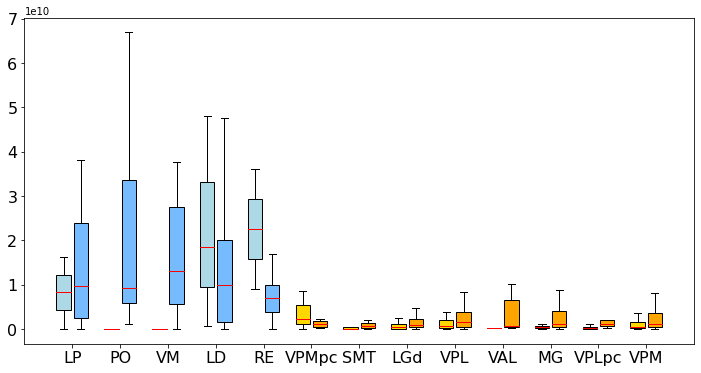

In [50]:
### 主要特征显示
data1=[]
N=0
data2=[]
for i in stype_th_all_ordered:
    if N<5:
        x=axonF_th_m[(th_m_ctype==i)&(th_m_LD==0)]['volume']
        y=axonF_th_m[(th_m_ctype==i)&(th_m_LD==1)]['volume']
    else:
        x=axonF_th_core[(th_core_ctype==i)&(th_c_LD==0)]['volume']
        y=axonF_th_core[(th_core_ctype==i)&(th_c_LD==1)]['volume']
    data1.append(x)
    data2.append(y)
    N+=1
plt.figure(figsize=(12,6))
p1=[i-0.18 for i in range(len(data1))]
p2=[i+0.18 for i in range(len(data1))]
bplot1=plt.boxplot(data1,positions=p1 ,widths=0.3,showmeans=False,labels=stype_th_all_ordered,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'},showfliers=False)
bplot2=plt.boxplot(data2,positions=p2 ,widths=0.3,showmeans=False,labels=stype_th_all_ordered,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'},showfliers=False)
colors2=['#75bbfd','#75bbfd','#75bbfd','#75bbfd','#75bbfd','orange','orange','orange','orange','orange','orange','orange','orange']
colors1=['lightblue','lightblue','lightblue','lightblue','lightblue','gold','gold','gold','gold','gold',
        'gold','gold','gold']
for patch, color in zip(bplot1['boxes'], colors1):
    patch.set_facecolor(color)
for patch, color in zip(bplot2['boxes'], colors2):
    patch.set_facecolor(color)
plt.xlim(-1,len(data1))
X=[i for i in range(len(data1))]
plt.xticks(X,stype_th_all_ordered,fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'TH_volume.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [105]:
ur_th_m

array(['CM', 'IAD', 'LD', 'LP', 'MD', 'PO', 'PVT', 'RE', 'VM'],
      dtype='<U3')

In [356]:
th_core_count_R2=np.delete(th_core_count_R,(0,1,3,5,6),axis=0)

In [357]:
th_m_count_R2=np.delete(th_m_count_R,(0,1,4,6),axis=0)

In [358]:
tmp1=np.vstack((axonF_th_core_mean,axonF_th_m_mean))
tmp2=np.vstack((th_core_count_R2,th_m_count_R2))
th_fp_table=np.hstack((tmp1,tmp2))

In [359]:
L2=L.copy()
#L2[0]='LD-c'
#L2[2]='MD-c'
#L2[10]='LD-m'
#L2[12]='MD-m'

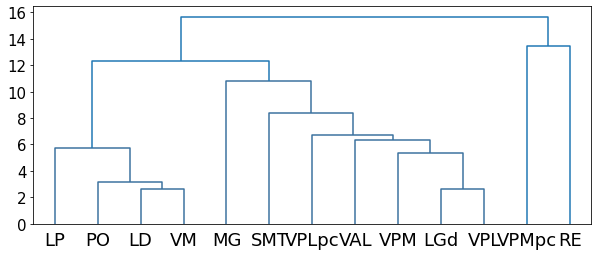

In [361]:
plt.figure(figsize=(10,4))
plt.grid(visible=False)
th_R_scale=StandardScaler().fit_transform(th_fp_table)
sch.set_link_color_palette(['#3b719f','#3b719f'])
dendrogram = sch.dendrogram(sch.linkage(th_R_scale , method = 'ward'),labels=L2,leaf_rotation=0,leaf_font_size=18)
#plt.xticks(weight='bold')
plt.yticks(fontsize=15)
plt.savefig(f'hierachical_th_R2.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [26]:
lgd=th_core_count[th_core_ctype=='LGd']
lp=th_m_count[th_m_ctype=='LP']

In [27]:
lgd_df=pd.DataFrame(lgd)
lgd_df.columns=['TH','CTX','CNU','HY','CB','MB','HB']
lp_df=pd.DataFrame(lp)
lp_df.columns=['TH','CTX','CNU','HY','CB','MB','HB']

In [28]:
theg_label=[]
for i in range(78):
    theg_label.append(0)
for i in range(16):
    theg_label.append(1)
theg_label=np.array(theg_label)

In [135]:
theg_table=np.vstack((lgd,lp))
theg_table=pd.DataFrame(theg_table)
theg_table.columns=['TH','CTX','CNU','HY','CB','MB','HB']

In [630]:
scaled_theg = StandardScaler().fit_transform(theg_table)

In [631]:
pca = PCA()
reduced_theg = pca.fit_transform(scaled_theg)

In [29]:
th_ctype=np.hstack((th_core_ctype,th_m_ctype))

In [30]:
### lp & lgd CTX和MB的投射占自身长度的比重
lgd_p=TH_table[th_ctype=="LGd"]
lp_p=TH_table[th_ctype=="LP"]

In [31]:
### basal
basal_lgd=basalF[basalF['region']=="LGd"]
basal_lp=basalF[basalF['region']=="LP"]

In [32]:
names_lgd=list(th_core[th_core_ctype=="LGd"]['name'])

In [33]:
names_lp=list(th_m[th_m_ctype=="LP"]['name'])

In [34]:
lgd_table=[]
for i in names_lgd:
    name=i[:-2]
    line=basal_lgd[basal_lgd['name']==name]
    line=line.reset_index(drop=True)
    lgd_table.append([line['p_length'][0],line['branch'][0],line['volume'][0]])

In [35]:
lp_table=[]
for i in names_lp:
    name=i[:-2]
    line=basal_lp[basal_lp['name']==name]
    line=line.reset_index(drop=True)
    lp_table.append([line['p_length'][0],line['branch'][0],line['volume'][0]])

In [36]:
lp_table=pd.DataFrame(lp_table)
lp_table.columns=['total path','#branch','volume']

In [37]:
lp_table['projection strength']=list(lp_p['CTX_p'])

In [38]:
lgd_table=pd.DataFrame(lgd_table)
lgd_table.columns=['total path','#branch','volume']
lgd_table['projection strength']=list(lgd_p['CTX_p'])

In [39]:
lgd_lp_label=[]
for i in range(len(lgd_table)):
    lgd_lp_label.append('LGd')
for i in range(len(lp_table)):
    lgd_lp_label.append('LP')

In [40]:
lgd_lp_table=pd.concat([lgd_table,lp_table],axis=0)

In [41]:
lgd_lp_table['type']=lgd_lp_label

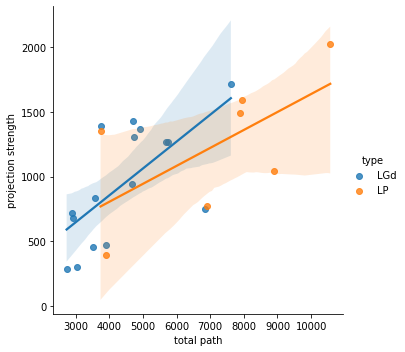

In [54]:
L1=sns.lmplot(x = 'total path', y = 'projection strength', data = lgd_lp_table2 ,hue='type')
plt.savefig(f'LGd_LP_path.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [45]:
### axonal
lgd_lp_axon=list(lgd_axonF['volume'])+list(lp_axonF['volume'])

In [46]:
lgd_lp_b=list(lgd_axonF['branch'])+list(lp_axonF['branch'])

In [47]:
lgd_lp_p=list(lgd_axonF['total_path_length'])+list(lp_axonF['total_path_length'])

In [48]:
lgd_lp_table['axon volume']=lgd_lp_axon

In [49]:
lgd_lp_table['axon branch']=lgd_lp_b

In [50]:
lgd_lp_table['axon path length']=lgd_lp_p

In [51]:
lgd_lp_table2=lgd_lp_table.copy()
lgd_lp_table2=lgd_lp_table2[lgd_lp_table2['projection strength']!=0]

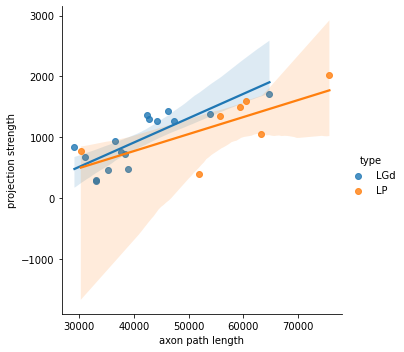

In [55]:
sns.lmplot(x = 'axon path length', y = 'projection strength', data = lgd_lp_table2 ,hue='type')
plt.savefig(f'LGd_LP_axon.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [15]:
lp_n=[]
for i in range(len(lp)):
    r=str(lp['regions'][i])
    if r != "nan":
        rlist=r.split(",")
        c=len(rlist)
        lp_n.append(c)
    else:
        lp_n.append(0)

In [16]:
lgd_n=[]
for i in range(len(lgd)):
    r=str(lgd['regions'][i])
    if r != "nan":
        rlist=r.split(",")
        c=len(rlist)
        lgd_n.append(c)
    else:
        lgd_n.append(0)

In [44]:
lp_axonF=axonF[axonF['region']=='LP'][['max_density','volume','branch','d_to_soma2','total_path_length']]
lgd_axonF=axonF[axonF['region']=='LGd'][['max_density','volume','branch','d_to_soma2','total_path_length']]

In [139]:
lp_bF=basal[basal['region']=='LP'][['volume','branch']]
lgd_bF=basal[basal['region']=='LGd'][['volume','branch']]

NameError: name 'basal' is not defined

In [680]:
lp_axonF=lp_axonF.reset_index(drop=True)
lgd_axonF=lgd_axonF.reset_index(drop=True)
lgd_df=lgd_df.reset_index(drop=True)
lp_df=lp_df.reset_index(drop=True)

In [681]:
lp_table=pd.concat([lp_axonF,lp_df],axis=1)
lgd_table=pd.concat([lgd_axonF,lgd_df],axis=1).reset_index(drop=True)

In [682]:
lgd_lp_table=pd.concat([lp_table,lgd_table])

In [684]:
scaled_lgd_lp = StandardScaler().fit_transform(lgd_lp_table)

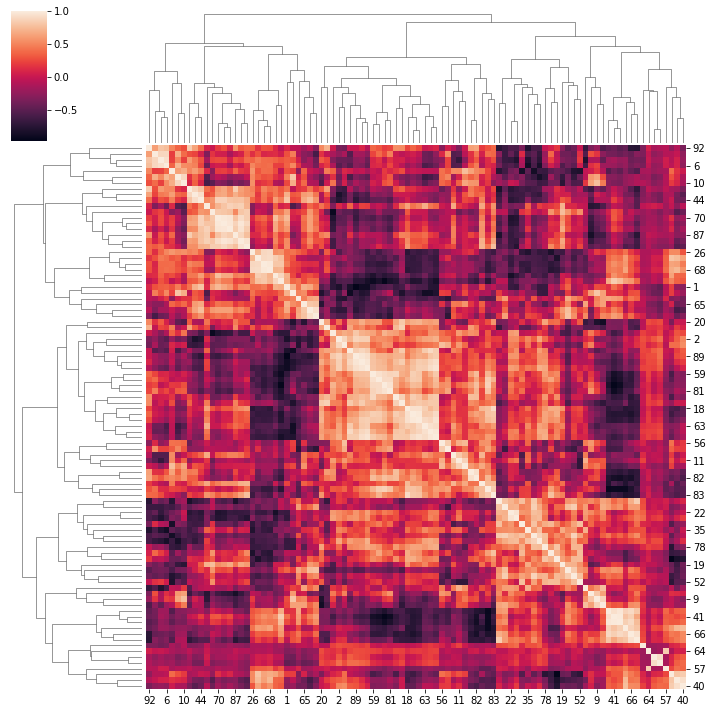

In [686]:
sns.clustermap(np.corrcoef(scaled_lgd_lp))

In [16]:
th_core_gf=pd.read_csv('2023/TH_core_gf.csv')
th_matrix_gf=pd.read_csv('2023/TH_matrix_gf.csv')

In [17]:
stype_th_core=[]
for i in range(len(th_core_gf)):
    name=str(th_core_gf['Name'][i])[:-11]
    line=table[table['Name']==name]
    line=line.reset_index(drop=True)
    r=line['Soma_region'][0]
    stype_th_core.append(r)
stype_th_core=np.array(stype_th_core)

In [18]:
stype_th_matrix=[]
for i in range(len(th_matrix_gf)):
    name=str(th_matrix_gf['Name'][i])[:-11]
    line=table[table['Name']==name]
    line=line.reset_index(drop=True)
    r=line['Soma_region'][0]
    stype_th_matrix.append(r)
stype_th_matrix=np.array(stype_th_matrix)

In [19]:
### TH-matrix: LP,RE,PO,VM,LD,MD
### TH-core: SMT,VPMpc,LGd,VPL,VAL,MG,VPLpc,VPM,LD,MD
#stype_required=['LP','RE','PO','VM','LD-m','MD-m','SMT','VPMpc','LGd','VPL','VAL','MG','VPLpc','VPM','LD-c','MD-c']
stype_required=['LP','PO','VM','LD','RE','VPMpc','SMT','LGd','VPL','VAL','MG','VPLpc','VPM']

In [117]:
null_list1=list(th_core_gf[pd.isnull(th_core_gf['AverageBifurcationAngleLocal'])==True].index)
null_list2=list(th_matrix_gf[pd.isnull(th_matrix_gf['AverageBifurcationAngleLocal'])==True].index)


In [118]:
del_core=[]
for i in range(len(stype_th_core)):
    if (stype_th_core[i] not in stype_required)|(i in null_list1):
        del_core.append(i)
del_m=[]
for i in range(len(stype_th_matrix)):
    if (stype_th_matrix[i] not in stype_required)|(i in null_list2):
        del_m.append(i)

In [20]:
del_core2=[]
for i in range(len(stype_th_core)):
    if (stype_th_core[i] not in stype_required)|(stype_th_core[i]=='LD'):
        del_core2.append(i)
del_m2=[]
for i in range(len(stype_th_matrix)):
    if (stype_th_matrix[i] not in stype_required):
        del_m2.append(i)

In [119]:
th_core_gf2=th_core_gf.drop(del_core,axis=0,inplace=False)
th_core_gf2=th_core_gf2.reset_index(drop=True)
th_matrix_gf2=th_matrix_gf.drop(del_m,axis=0,inplace=False)
th_matrix_gf2=th_matrix_gf2.reset_index(drop=True)

In [21]:
th_core_gf3=th_core_gf.drop(del_core2,axis=0,inplace=False)
th_core_gf3=th_core_gf3.reset_index(drop=True)
th_matrix_gf3=th_matrix_gf.drop(del_m2,axis=0,inplace=False)
th_matrix_gf3=th_matrix_gf3.reset_index(drop=True)

In [22]:
core_m_labels=[]
for i in range(len(th_core_gf3)):
    core_m_labels.append(0)
for i in range(len(th_matrix_gf3)):
    core_m_labels.append(1)
core_m_labels=np.array(core_m_labels)


In [61]:
th_gf=pd.concat([th_core_gf2,th_matrix_gf2])


NameError: name 'th_core_gf2' is not defined

In [23]:
th_gf_all=pd.concat([th_core_gf3,th_matrix_gf3])


In [401]:
len(th_gf_all)

1273

In [279]:
tmp1=np.delete(stype_th_core,del_core)
tmp2=np.delete(stype_th_matrix,del_m)
stype_th=np.append(tmp1,tmp2)

In [24]:
tmp1=np.delete(stype_th_core,del_core2)
tmp2=np.delete(stype_th_matrix,del_m2)
stype_th_all=np.append(tmp1,tmp2)

In [403]:
len(stype_th_all)

1273

In [64]:
th_gf2=th_gf[['Nodes','Bifurcations','OverallWidth','OverallHeight','OverallDepth','Length',
              'Volume','MaxEuclideanDistance','MaxPathDistance','MaxBranchOrder',
              'AverageContraction','AverageFragmentation','AverageBifurcationAngleLocal',
              'HausdorffDimension','AverageBifurcationAngleRemote']]

NameError: name 'th_gf' is not defined

In [210]:
th_gf_scale=MinMaxScaler().fit_transform(th_gf2)


In [225]:
th_gf_scale2 = StandardScaler().fit_transform(th_gf2)


In [226]:
import umap
umap=umap.UMAP(random_state=42)
embedding=umap.fit_transform(th_gf_scale2)

In [229]:
pca = PCA()
reduced_th_gf = pca.fit_transform(th_gf_scale2)

In [245]:
pca.components_.T[:,0]

array([ 0.37851592,  0.39330555, -0.16481033, -0.17765952, -0.14318469,
        0.35691009,  0.35691005,  0.0567151 ,  0.122566  ,  0.36601236,
        0.19611505, -0.16477021,  0.14684364,  0.33628983,  0.12478514])

In [ ]:
pd.Categorical(stype_th).codes

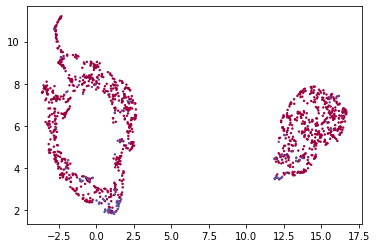

In [231]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=core_m_labels,cmap=plt.cm.Spectral, s=2)

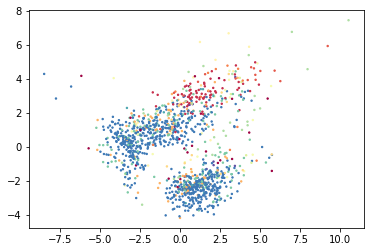

In [232]:
plt.scatter(reduced_th_gf[:, 0], reduced_th_gf[:, 1], c=pd.Categorical(stype_th).codes,cmap=plt.cm.Spectral, s=2)

In [256]:
th_gf_scaledf=pd.DataFrame(th_gf_scale,columns=th_gf2.columns)

In [257]:
th_gf_scaledf['stype']=stype_th


In [261]:
th_gf2_table=th_gf2.copy()
th_gf2_table['stype']=stype_th

In [26]:
th_all_table=th_gf_all.copy()
th_all_table['stype']=stype_th_all

In [317]:
np.unique(stype_th_all)

array(['LD-m', 'LGd', 'LP', 'MD-m', 'MG', 'PO', 'RE', 'SMT', 'VAL', 'VM',
       'VPL', 'VPLpc', 'VPM', 'VPMpc'], dtype='<U5')

In [25]:
#stype_th_all_ordered=['LP','RE','PO', 'VM','LD-m','MD-m', 'SMT','VPMpc','LGd', 'VPL','MD-c','VAL', 'LD-c','MG',
stype_th_all_ordered=['LP','PO', 'VM','LD', 'RE','VPMpc','SMT','LGd', 'VPL','VAL', 'MG',
        'VPLpc',  'VPM']

In [139]:
th_all_table.columns

Index(['Name', 'Nodes', 'SomaSurface', 'Stems', 'Bifurcations', 'Branches',
       'Tips', 'OverallWidth', 'OverallHeight', 'OverallDepth',
       'AverageDiameter', 'Length', 'Surface', 'Volume',
       'MaxEuclideanDistance', 'MaxPathDistance', 'MaxBranchOrder',
       'AverageContraction', 'AverageFragmentation',
       'AverageParent-daughterRatio', 'AverageBifurcationAngleLocal',
       'AverageBifurcationAngleRemote', 'HausdorffDimension', 'stype'],
      dtype='object')

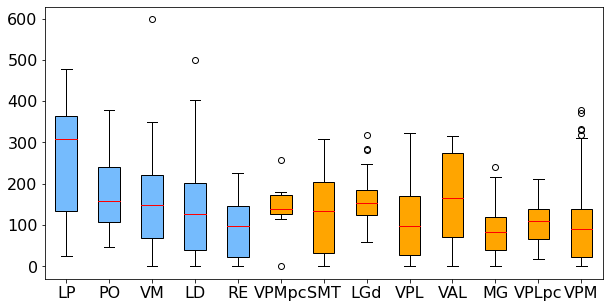

In [410]:
### 主要特征显示
data=[]
for i in stype_th_all_ordered:
    x=th_all_table[th_all_table['stype']==i]['Bifurcations']
    data.append(x)
plt.figure(figsize=(10,5))
bplot=plt.boxplot(data,widths=0.5,showmeans=False,labels=stype_th_all_ordered,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'})
colors=['#75bbfd','#75bbfd','#75bbfd','#75bbfd','#75bbfd','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'TH_bif.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

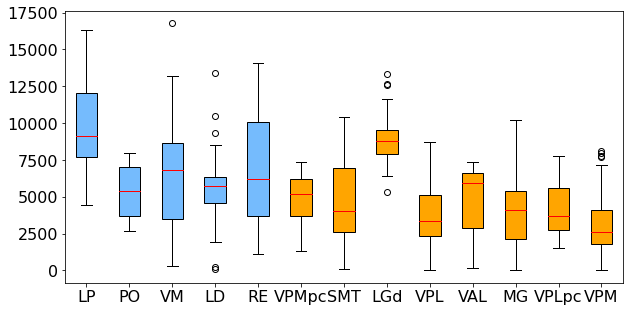

In [411]:
### 主要特征显示
data=[]
for i in stype_th_all_ordered:
    x=th_all_table[th_all_table['stype']==i]['MaxPathDistance']
    data.append(x)
plt.figure(figsize=(10,5))
bplot=plt.boxplot(data,widths=0.5,showmeans=False,labels=stype_th_all_ordered,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'})
colors=['#75bbfd','#75bbfd','#75bbfd','#75bbfd','#75bbfd','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'TH_pathlength.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

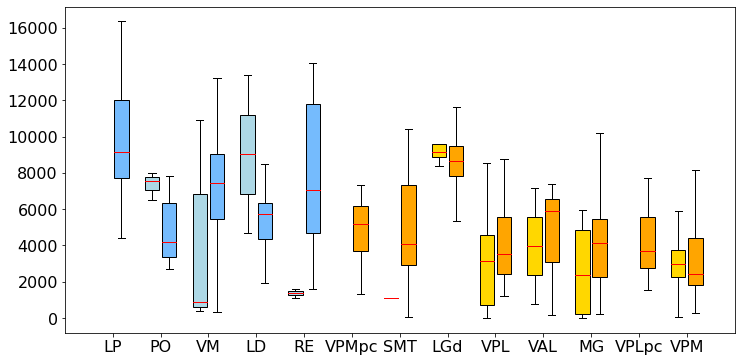

In [95]:
### 主要特征显示
data1=[]
N=0
data2=[]
for i in stype_th_all_ordered:
    x=th_all_table[(th_all_table['stype']==i)&(th_all_LD==0)]['MaxPathDistance']
    y=th_all_table[(th_all_table['stype']==i)&(th_all_LD==1)]['MaxPathDistance']
    data1.append(x)
    data2.append(y)
    N+=1
plt.figure(figsize=(12,6))
p1=[i-0.18 for i in range(len(data1))]
p2=[i+0.18 for i in range(len(data1))]
bplot1=plt.boxplot(data1,positions=p1 ,widths=0.3,showmeans=False,labels=stype_th_all_ordered,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'},showfliers=False)
bplot2=plt.boxplot(data2,positions=p2 ,widths=0.3,showmeans=False,labels=stype_th_all_ordered,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'},showfliers=False)
colors2=['#75bbfd','#75bbfd','#75bbfd','#75bbfd','#75bbfd','orange','orange','orange','orange','orange','orange','orange','orange']
#colors1=['lightblue','lightblue','lightblue','lightblue','lightblue','gold','gold','gold','gold','gold',
#        'gold','gold','gold']
for patch, color in zip(bplot1['boxes'], colors1):
    patch.set_facecolor(color)
for patch, color in zip(bplot2['boxes'], colors2):
    patch.set_facecolor(color)
plt.xlim(-1,len(data1))
X=[i for i in range(len(data1))]
plt.xticks(X,stype_th_all_ordered,fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'TH_path.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [27]:
ordered_th_stype=['LP','PO','VM','LD','SMT','LGd','VPL','VAL','MG','VPLpc','VPM','VPMpc','RE']

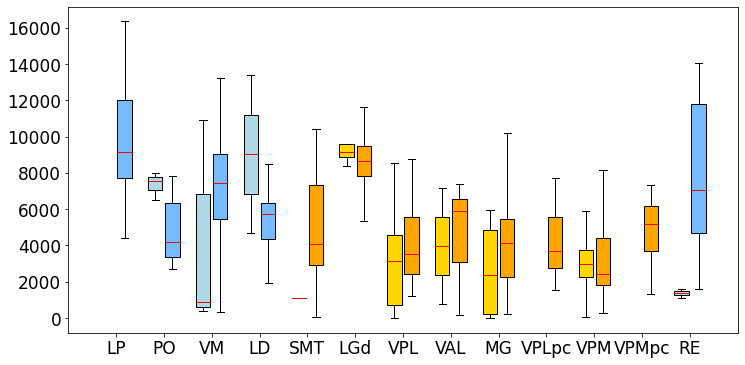

In [101]:
### 主要特征显示
data1=[]
N=0
data2=[]
for i in ordered_th_stype:
    x=th_all_table[(th_all_table['stype']==i)&(th_all_LD==0)]['MaxPathDistance']
    y=th_all_table[(th_all_table['stype']==i)&(th_all_LD==1)]['MaxPathDistance']
    data1.append(x)
    data2.append(y)
    N+=1
plt.figure(figsize=(12,6))
p1=[i-0.18 for i in range(len(data1))]
p2=[i+0.18 for i in range(len(data1))]
bplot1=plt.boxplot(data1,positions=p1 ,widths=0.3,showmeans=False,labels=ordered_th_stype,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'},showfliers=False)
bplot2=plt.boxplot(data2,positions=p2 ,widths=0.3,showmeans=False,labels=ordered_th_stype,patch_artist=True,
                 medianprops = {'linestyle':'-','color':'red'},showfliers=False)
color2=['#75bbfd','#75bbfd','#75bbfd','#75bbfd','orange','orange','orange','orange','orange','orange','orange','orange','#75bbfd']
color1=['lightblue','lightblue','lightblue','lightblue','gold','gold','gold','gold','gold',
        'gold','gold','gold','lightblue']
for patch, color in zip(bplot1['boxes'], color1):
    patch.set_facecolor(color)
for patch, color in zip(bplot2['boxes'], color2):
    patch.set_facecolor(color)
plt.xlim(-1,len(data1))
X=[i for i in range(len(data1))]
plt.xticks(X,ordered_th_stype,fontsize=17)
plt.yticks(fontsize=17)
plt.savefig(f'TH_path2.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [428]:
th_all_table.columns

Index(['Name', 'Nodes', 'SomaSurface', 'Stems', 'Bifurcations', 'Branches',
       'Tips', 'OverallWidth', 'OverallHeight', 'OverallDepth',
       'AverageDiameter', 'Length', 'Surface', 'Volume',
       'MaxEuclideanDistance', 'MaxPathDistance', 'MaxBranchOrder',
       'AverageContraction', 'AverageFragmentation',
       'AverageParent-daughterRatio', 'AverageBifurcationAngleLocal',
       'AverageBifurcationAngleRemote', 'HausdorffDimension', 'stype'],
      dtype='object')

In [431]:
axonF_th_core.columns

Index(['max_density', 'volume', 'branch', 'd_to_soma2'], dtype='object')

In [435]:
re=[]
vpmpc=[]
for i in ['Bifurcations','OverallWidth','OverallHeight','OverallDepth','MaxPathDistance','MaxBranchOrder','AverageBifurcationAngleLocal']:
    a1=th_all_table[th_all_table['stype']=='RE'][i].mean()
    a2=th_all_table[th_all_table['stype']=='VPMpc'][i].mean()
    if i in ['OverallWidth','OverallHeight','OverallDepth','MaxPathDistance']:
        a1=a1/100
        a2=a2/100
    re.append(a1)
    vpmpc.append(a2)
re.append(axonF_th_m[th_m_ctype=='RE']['max_density'].mean())
vpmpc.append(axonF_th_core[th_core_ctype=='VPMpc']['max_density'].mean())
re=np.array(re)
vpmpc=np.array(vpmpc)

(<a list of 16 Line2D ticklines objects>,
 [Text(0.0, 0, 'Bifurcation'),
  Text(0.7853981633974483, 0, 'Width'),
  Text(1.5707963267948966, 0, 'Height'),
  Text(2.356194490192345, 0, 'Depth'),
  Text(3.141592653589793, 0, 'Path'),
  Text(3.9269908169872414, 0, 'Branch\nOrder'),
  Text(4.71238898038469, 0, 'Bifurcation\nAngle(Local)'),
  Text(5.497787143782138, 0, 'Max\nDensity')])

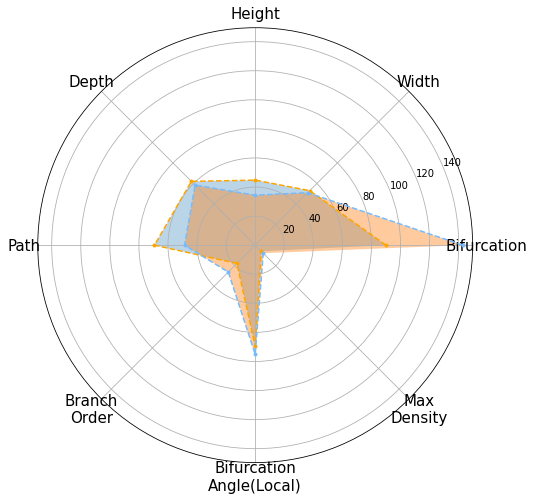

In [446]:
plt.figure(figsize=(8,8))

ax1= plt.subplot(111, projection='polar')
#ax1.set_title('Radar Map')  # 创建标题
#ax1.set_rlim(0,13)

theta=np.arange(0,2*np.pi,2*np.pi/8)

ax1.plot(theta,re,'.--',label='RE',color='orange')
ax1.fill(theta,re,alpha=0.3)
ax1.plot(theta,vpmpc,'.--',label='VPMpc',color='#75bbfd')
ax1.fill(theta,vpmpc,alpha=0.4)
#plt.savefig(f'RE_VPMpc.png',bbox_inches='tight',pad_inches=0.2,dpi=800)
#plt.legend(["RE", "VPMpc"], loc='right')
ax1.set_thetagrids(theta*180/np.pi, ['Bifurcation','Width','Height','Depth','Path','Branch\nOrder','Bifurcation\nAngle(Local)','Max\nDensity'],fontsize=15)

In [28]:
### dendritic
th_core_b=pd.read_csv('2023/TH_core_basalgf.csv')
th_matrix_b=pd.read_csv('2023/TH_m_basalgf.csv')


In [71]:
th_all_table.shape

(1300, 24)

In [29]:
th_all_table=th_all_table.reset_index(drop=True)


In [59]:
### Path Length
# core:0; matrix:1
N=0
pathL_th=[]
for i in list(th_all_table['Name']):
    name=str(i)[:-11]+'.swc'
    if core_m_labels[N]==0:
        line=th_core_b[th_core_b['Name']==name]
        line=line.reset_index(drop=True)
        pathL_th.append([line['MaxPathDistance'][0],th_all_table['MaxPathDistance'][N]])
    else:
        line=th_matrix_b[th_matrix_b['Name']==name]
        line=line.reset_index(drop=True)
        pathL_th.append([line['MaxPathDistance'][0],th_all_table['MaxPathDistance'][N]])  
    N+=1

In [30]:
from statistics import mean

In [72]:
th_all_table

,Name,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,OverallWidth,OverallHeight,OverallDepth,...,MaxEuclideanDistance,MaxPathDistance,MaxBranchOrder,AverageContraction,AverageFragmentation,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension,stype
0,17302_00020_axon_0.swc,128,12.5664,1,29,59,31,6765.77,4853.91,8838.47,...,2641.510,3612.29,11,0.977102,1.135590,1,57.4159,55.5031,1.07263,VPL
1,17302_00020_axon_1.swc,712,12.5664,1,221,443,222,637.77,989.11,854.15,...,863.736,2750.65,42,0.990555,0.604966,1,77.6949,75.2337,1.71428,VPL
2,17302_00021_axon_0.swc,503,12.5664,1,161,323,162,896.59,513.85,1857.29,...,1987.590,2804.50,24,0.989523,0.554180,1,76.9985,77.5999,1.48180,VPL
3,17302_00021_axon_1.swc,82,12.5664,1,10,21,12,6678.05,4623.08,7929.45,...,3235.320,4003.41,7,0.984518,2.809520,1,91.3774,99.8316,1.04064,VPL
4,17302_00035_axon_0.swc,398,12.5664,1,84,169,86,8372.85,4626.02,10746.10,...,3174.170,6694.69,27,0.978423,1.343200,1,73.8597,68.7721,1.31395,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,18465_00245_axon_1.swc,1111,12.5664,1,238,477,239,2356.07,1737.42,2555.28,...,2978.480,5489.29,33,0.988349,1.327040,1,72.6907,70.9645,1.45214,VM
1269,18465_00245_axon_2.swc,634,12.5664,1,134,269,136,6918.73,5273.23,10237.40,...,4804.630,7731.35,30,0.983902,1.349440,1,70.3120,65.9257,1.23061,VM
1270,18465_00313_axon_0.swc,517,12.5664,1,204,409,205,2886.07,1791.03,1449.31,...,3465.050,4596.87,60,0.995455,0.261614,1,83.1428,81.5126,1.28093,LD
1271,18465_00313_axon_1.swc,1179,12.5664,1,500,1001,501,1110.65,917.83,729.37,...,1122.730,1954.75,50,0.996979,0.176823,1,79.2937,78.9360,1.61567,LD


In [75]:
axonF

,name,arbor_id,region,max_density,num_nodes,total_path_length,volume,branch,d_to_soma,d_to_soma2,hub,variance_ratio
0,18454_01067,0,VPM,4,186,10536.1209,3.373886e+09,40,2059.6696,928.164264,0,0.644444
1,18454_01067,1,VPM,8,666,29984.3407,5.076044e+08,213,3802.5354,3924.222255,0,0.494247
2,18454_00136,0,VPM,8,647,31310.2917,1.196188e+09,192,3563.4984,3499.514802,0,0.382724
3,18454_00136,1,VPM,6,544,29354.5700,1.165952e+10,119,3301.3252,3307.751358,0,0.590539
4,18463_00027,0,VPM,7,339,15277.5704,8.556409e+07,114,2574.4534,2507.715574,0,0.588763
...,...,...,...,...,...,...,...,...,...,...,...,...
3761,18867_6452_x16339_y18318,2,BS,9,179,7910.1583,2.563350e+09,46,2806.6621,3266.200347,0,0.566784
3762,17109_6501_x6997_y4287,0,AUDpo,3,787,53872.5380,4.095778e+10,46,3252.3294,3726.831121,0,0.533410
3763,236174_4129_x16214_y10304,0,FS,10,1145,73438.7697,4.169564e+10,117,1620.2286,101.063849,0,0.544653
3764,236174_4129_x16214_y10304,1,FS,6,936,62256.0945,2.999860e+10,74,3194.3083,4664.308675,0,0.517524


In [31]:
th_all_LD=[]
for i in range(len(th_all_table)):
    name=str(th_all_table['Name'][i])[:-11]
    aid=int(str(th_all_table['Name'][i])[-5:-4])
    line_id=axonF[(axonF['name']==name)&(axonF['arbor_id']==aid)].index[0]
    th_all_LD.append(LD_marker[line_id])
th_all_LD=np.array(th_all_LD)

In [63]:
stype_th_all2=[]
N=0
pathL_th2=[]
for i in range(len(th_core_b)):
    name=str(th_core_b['Name'][i])[:-4]
    line=th_all_table[th_all_table['Name'].str.contains(name)]
    name2=str(th_core_b['Name'][i])[:-11]
    if len(line)==0:
        continue
    meanL=mean(list(line['MaxPathDistance']))
    pathL_th2.append([th_core_b['MaxPathDistance'][i],meanL]) 
    line2=table[table['Name']==name]
    line2=line2.reset_index(drop=True)
    stype_th_all2.append(line2['Soma_region'][0])
    N+=1
M=0
for i in range(len(th_matrix_b)):
    name=str(th_matrix_b['Name'][i])[:-4]
    line=th_all_table[th_all_table['Name'].str.contains(name)]
    if len(line)==0:
        continue
    meanL=mean(list(line['MaxPathDistance']))
    pathL_th2.append([th_matrix_b['MaxPathDistance'][i],meanL]) 
    line2=table[table['Name']==name]
    line2=line2.reset_index(drop=True)
    stype_th_all2.append(line2['Soma_region'][0])
    M+=1

In [64]:
stype_th_all2=np.array(stype_th_all2)

In [65]:
pathL_th2=np.array(pathL_th2)

In [357]:
pca=PCA(n_components=2)
pca_th=pca.fit_transform(pathL_th)

In [417]:
stype_th_all_ordered

['LP',
 'PO',
 'VM',
 'LD',
 'RE',
 'VPMpc',
 'SMT',
 'LGd',
 'VPL',
 'VAL',
 'MG',
 'VPLpc',
 'VPM']

In [32]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [71]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

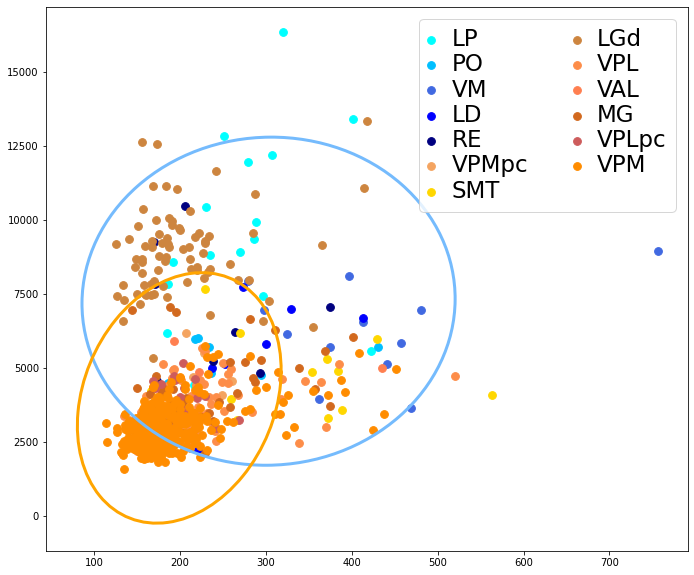

In [473]:
fig, ax = plt.subplots(figsize=(11.5, 10))
colors2=['aqua','deepskyblue','royalblue','blue','navy',
        'sandybrown','gold','peru','#fd8d49','coral','chocolate','indianred','darkorange']
n=0
pts1=pathL_th2[stype_th_all2==stype_th_all_ordered[0],]
pts2=pathL_th2[stype_th_all2==stype_th_all_ordered[5],]
for i in stype_th_all_ordered:
    tmp=pathL_th2[stype_th_all2==i,]
    ax.scatter(tmp[:,0], tmp[:,1], s=60, c=colors2[n],label=i)
    if (n<5)&(n>0):
        pts1=np.vstack((pts1,tmp))
    elif n>5:
        pts2=np.vstack((pts2,tmp))
    n+=1
pts1=np.array(pts1)
pts2=np.array(pts2)
confidence_ellipse(pts1[:,0], pts1[:,1], ax, edgecolor='#75bbfd',linewidth=3)
confidence_ellipse(pts2[:,0], pts2[:,1], ax, edgecolor='orange',linewidth=3)
ax.legend(fontsize=23,ncol=2,labelspacing=0.1,borderpad=0.4,handlelength=0.2)
plt.savefig(f'TH_AD.png',bbox_inches='tight',pad_inches=0.2,dpi=800)


In [33]:
stype_th_all3=[]
N=0
pathL_th3=[]
for i in range(len(th_core_b)):
    name=str(th_core_b['Name'][i])[:-4]
    line=th_all_table[th_all_table['Name'].str.contains(name)]
    if len(line)==0:
        continue
    line1=th_all_table[(th_all_table['Name'].str.contains(name))&(th_all_LD==0)]
    line2=th_all_table[(th_all_table['Name'].str.contains(name))&(th_all_LD==1)]
    if len(line1)==0:
        meanL1=0
    else:
        meanL1=mean(list(line1['MaxPathDistance']))
    if len(line2)==0:
        meanL2=0
    else:
        meanL2=mean(list(line2['MaxPathDistance']))
    pathL_th3.append([th_core_b['MaxPathDistance'][i],meanL1,meanL2]) 
    line3=table[table['Name']==name]
    line3=line3.reset_index(drop=True)
    stype_th_all3.append(line3['Soma_region'][0])
    N+=1
M=0
for i in range(len(th_matrix_b)):
    name=str(th_matrix_b['Name'][i])[:-4]
    line=th_all_table[th_all_table['Name'].str.contains(name)]
    if len(line)==0:
        continue
    line1=th_all_table[(th_all_table['Name'].str.contains(name))&(th_all_LD==0)]
    line2=th_all_table[(th_all_table['Name'].str.contains(name))&(th_all_LD==1)]
    if len(line1)==0:
        meanL1=0
    else:
        meanL1=mean(list(line1['MaxPathDistance']))
    if len(line2)==0:
        meanL2=0
    else:
        meanL2=mean(list(line2['MaxPathDistance']))
    pathL_th3.append([th_matrix_b['MaxPathDistance'][i],meanL1,meanL2]) 
    line3=table[table['Name']==name]
    line3=line3.reset_index(drop=True)
    stype_th_all3.append(line3['Soma_region'][0])
    M+=1
    

In [34]:
stype_th_all3=np.array(stype_th_all3)
pathL_th3=np.array(pathL_th3)

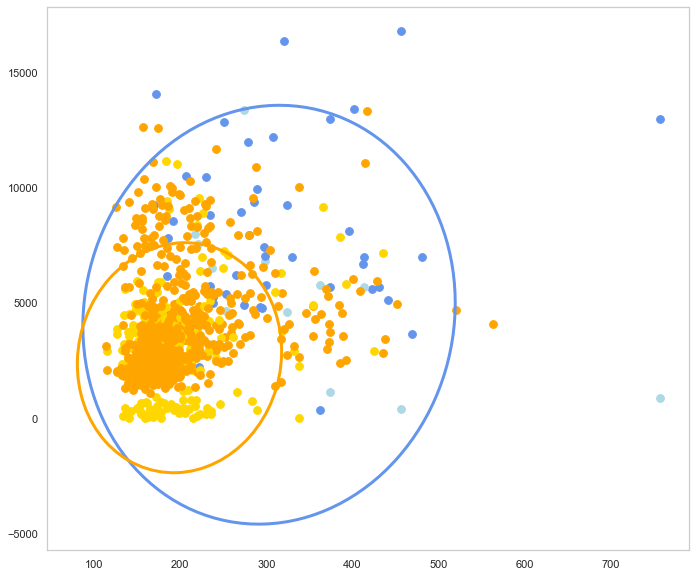

In [134]:
fig, ax = plt.subplots(figsize=(11.5, 10))
#colors2=['aqua','deepskyblue','royalblue','blue','navy',
#        'sandybrown','gold','peru','#fd8d49','coral','chocolate','indianred','darkorange']
n=0
tmp1=pathL_th3[stype_th_all3==stype_th_all_ordered[0],]
pts1=tmp1[:,[0,1]]
pts1=np.vstack((pts1,tmp1[:,[0,2]]))
tmp2=pathL_th3[stype_th_all3==stype_th_all_ordered[5],]
pts2=tmp2[:,[0,1]]
pts2=np.vstack((pts2,tmp2[:,[0,2]]))
for i in stype_th_all_ordered:
    tmp=pathL_th3[stype_th_all3==i,]
    if n<5:
        ax.scatter(tmp[tmp[:,1]!=0,0], tmp[tmp[:,1]!=0,1], s=60, c='lightblue',label='TH-matrix_local')
        ax.scatter(tmp[tmp[:,2]!=0,0], tmp[tmp[:,2]!=0,2], s=60, c='cornflowerblue',label='TH-matrix_distal')
    else:
        ax.scatter(tmp[tmp[:,1]!=0,0], tmp[tmp[:,1]!=0,1], s=60, c='gold',label='TH-core_local')
        ax.scatter(tmp[tmp[:,2]!=0,0], tmp[tmp[:,2]!=0,2], s=60, c='orange',label='TH-core_distal')
    if (n<5)&(n>0):
        pts1=np.vstack((pts1,tmp[:,[0,1]]))
        pts1=np.vstack((pts1,tmp[:,[0,2]]))
    elif n>5:
        pts2=np.vstack((pts2,tmp[:,[0,1]]))
        pts2=np.vstack((pts2,tmp[:,[0,2]]))
    n+=1
pts1=np.array(pts1)
pts2=np.array(pts2)
confidence_ellipse(pts1[:,0], pts1[:,1], ax, edgecolor='cornflowerblue',linewidth=3)
confidence_ellipse(pts2[:,0], pts2[:,1], ax, edgecolor='orange',linewidth=3)
ax.grid(False)
#confidence_ellipse(pts1[pts1[:,1]!=0,0], pts1[pts1[:,1]!=0,1], ax, edgecolor='lightblue',linewidth=3)
#confidence_ellipse(pts2[pts2[:,1]!=0,0], pts2[pts2[:,1]!=0,1], ax, edgecolor='gold',linewidth=3)
#confidence_ellipse(pts1[pts1[:,2]!=0,0], pts1[pts1[:,2]!=0,2], ax, edgecolor='cornflowerblue',linewidth=3)
#confidence_ellipse(pts2[pts2[:,2]!=0,0], pts2[pts2[:,2]!=0,2], ax, edgecolor='orange',linewidth=3)
#ax.legend(fontsize=23,ncol=2,labelspacing=0.1,borderpad=0.4,handlelength=0.2)
plt.savefig(f'TH_AD.png',bbox_inches='tight',pad_inches=0.2,dpi=800)
#plt.savefig(f'TH_AD2.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [35]:
import math

<ipython-input-78-627e73fef6d9>:6: RuntimeWarning: divide by zero encountered in log
  tmp2=np.log(tmp)


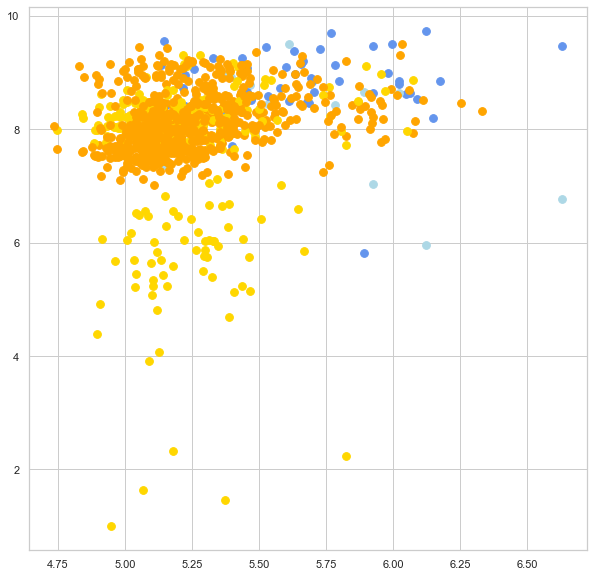

In [78]:
### 取log 画散点
fig, ax = plt.subplots(figsize=(10, 10))
n=0
for i in stype_th_all_ordered:
    tmp=pathL_th3[stype_th_all3==i,]
    tmp2=np.log(tmp)
    if n<5:
        ax.scatter(tmp2[tmp[:,1]!=0,0], tmp2[tmp[:,1]!=0,1], s=60, c='lightblue',label='TH-matrix_local')
        ax.scatter(tmp2[tmp[:,2]!=0,0], tmp2[tmp[:,2]!=0,2], s=60, c='cornflowerblue',label='TH-matrix_distal')
    else:
        ax.scatter(tmp2[tmp[:,1]!=0,0], tmp2[tmp[:,1]!=0,1], s=60, c='gold',label='TH-core_local')
        ax.scatter(tmp2[tmp[:,2]!=0,0], tmp2[tmp[:,2]!=0,2], s=60, c='orange',label='TH-core_distal')
    n+=1

In [56]:
d_p=[]
a_p=[]
t=[]
n=0
for i in stype_th_all_ordered:
    tmp=pathL_th3[stype_th_all3==i,]
    tmp2=np.log(tmp)
    for k in tmp2[tmp[:,1]!=0,0]:
        d_p.append(k)
    for k in tmp2[tmp[:,1]!=0,1]:
        a_p.append(k)
    L1=len(tmp2[tmp[:,1]!=0,0])
    for k in tmp2[tmp[:,2]!=0,0]:
        d_p.append(k)
    for k in tmp2[tmp[:,2]!=0,2]:
        a_p.append(k)
    L2=len(tmp2[tmp[:,2]!=0,0])
    if n<5:
        for j in range(L1+L2):
        #for j in range(L1):
            t.append('TH-matrix')
    else:
        for j in range(L1+L2):
        #for j in range(L1):
            t.append('TH-core')
    n=n+1
linear_th=pd.DataFrame({'dendritic path':d_p,'axonal path':a_p,'type':t})   

<ipython-input-56-3be3f8fab5fd>:7: RuntimeWarning: divide by zero encountered in log
  tmp2=np.log(tmp)


In [49]:
d_p=[]
a_p=[]
t=[]
n=0
for i in stype_th_all_ordered:
    tmp=pathL_th3[stype_th_all3==i,]
    tmp2=np.exp(tmp)
    #for k in tmp2[tmp[:,1]!=0,0]:
    #    d_p.append(k)
    #for k in tmp2[tmp[:,1]!=0,1]:
    #    a_p.append(k)
    #L1=len(tmp2[tmp[:,1]!=0,0])
    for k in tmp2[tmp[:,2]!=0,0]:
        d_p.append(k)
    for k in tmp2[tmp[:,2]!=0,2]:
        a_p.append(k)
    L2=len(tmp2[tmp[:,2]!=0,0])
    if n<5:
        #for j in range(L1+L2):
        for j in range(L2):
            t.append(0)
    else:
        #for j in range(L1+L2):
        for j in range(L2):
            t.append(1)
    n=n+1
linear_th=pd.DataFrame({'dendritic path':d_p,'axonal path':a_p,'type':t})   

<ipython-input-49-827b0a0e06d5>:7: RuntimeWarning: overflow encountered in exp
  tmp2=np.exp(tmp)


In [37]:
from matplotlib.colors import ListedColormap 
import matplotlib as mpl 
import cmaps 

In [38]:
palette4 = {'TH-matrix': "cornflowerblue", 'TH-core': "orange"}

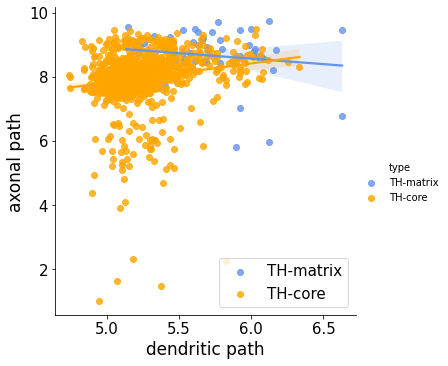

In [57]:
L1=sns.lmplot(x = 'dendritic path', y = 'axonal path', data = linear_th ,hue='type',palette=palette4)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.xlabel('dendritic path', fontsize=17)
plt.ylabel('axonal path', fontsize=17)
plt.grid(False)
plt.savefig(f'LGd_LP_path.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

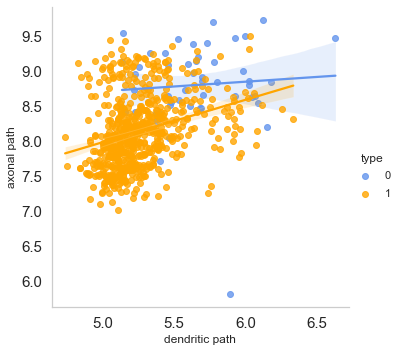

In [105]:
L1=sns.lmplot(x = 'dendritic path', y = 'axonal path', data = linear_th ,hue='type',palette=palette4)
plt.grid(None)
plt.tick_params(labelsize=15)
#plt.savefig(f'LGd_LP_path.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [111]:
import seaborn as sns

In [112]:
pathL_th_table=pd.DataFrame(pathL_th2)
pathL_th_table.columns=['Dendritic','Axonal']
pathL_th_table['somaRegion']=stype_th_all2

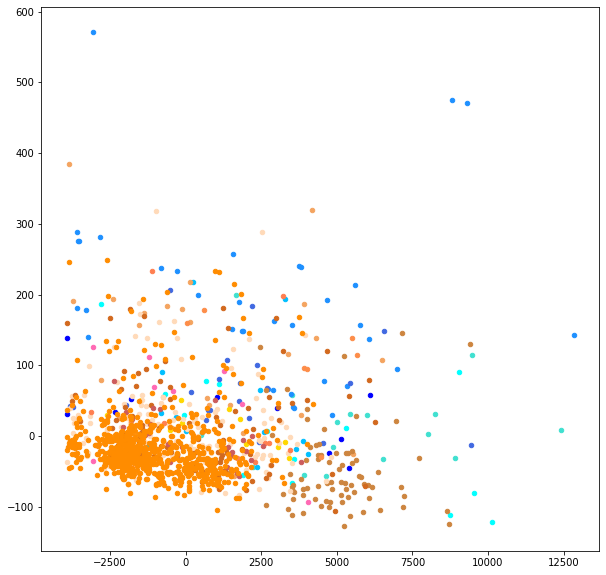

In [363]:
plt.figure(figsize=(10,10))
colors2=['turquoise','aqua','deepskyblue','dodgerblue','royalblue','blue',
        'sandybrown','gold','peru','peachpuff','#fd8d49','coral','hotpink','chocolate','indianred','darkorange']
N=0
for i in stype_th_all_ordered:
    tmp=pca_th[stype_th_all==i]
    plt.scatter(tmp[:,0], tmp[:,1], s=20, c=colors2[N])
    N+=1

In [ ]:
sns.lmplot(x = '', y = 'coverage', data = p_s ,hue='p_type')


In [129]:
c1=['LP' for i in range(len(lp_axonF))]
c2=['LGd' for i in range(len(lgd_axonF))]

In [146]:
##合并LP和LGd看一下
p1=lp_m.copy()
p1['p_type']=c1
p2=lgd_axonF.copy()
p2['coverage']=lgd_n
p2['p_type']=c2
p=pd.concat([p1,p2],axis=0)
p=p.reset_index(drop=True)

In [135]:
p_s=(p[['max_density', 'volume', 'branch', 'd_to_soma2', 'coverage',]]-p[['max_density', 'volume', 'branch', 'd_to_soma2', 'coverage',]].min())/(p[['max_density', 'volume', 'branch', 'd_to_soma2', 'coverage',]].max()-p[['max_density', 'volume', 'branch', 'd_to_soma2', 'coverage',]].min())

In [139]:
p_s['p_type']=p['p_type']

In [109]:
row_c=dict(zip([0,1,2,3,4,5,6,7,8,11],['green','green','green','green','green','yellow','yellow','yellow','yellow','yellow']))

In [115]:
row_c=dict(zip([0,1],['green','yellow']))

In [103]:
p['coverage'].unique()

array([11,  5,  8,  7,  4,  1,  2,  0,  6,  3])

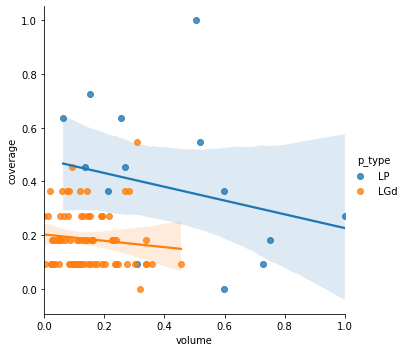

In [154]:
sns.lmplot(x = 'volume', y = 'coverage', data = p_s ,hue='p_type')

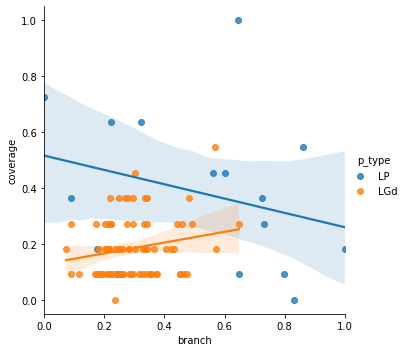

In [155]:
sns.lmplot(x = 'branch', y = 'coverage', data = p_s ,hue='p_type')

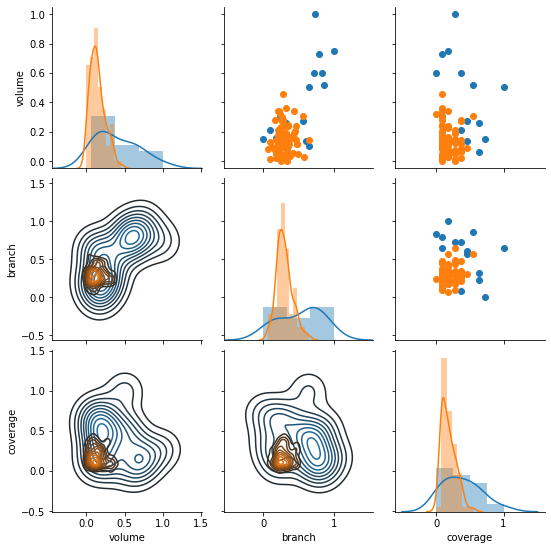

In [150]:
g = sns.PairGrid(p_s[['volume','branch','coverage','p_type']],hue='p_type')
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [ ]:
g = sns.PairGrid(p_s[['volume','branch','coverage','p_type']],hue='p_type')
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [103]:
### projection analysis
lgd_r=pd.read_csv("2023/LGd_R.txt",sep=" ",header=None)
lp_r=pd.read_csv("2023/LP_R.txt",sep=" ",header=None)

In [105]:
lgd_r.columns=['name','region']
lp_r.columns=['name','region']

In [106]:
regions_involved=[]
for i in range(len(lp_r)):
    r=str(lp_r['region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j not in regions_involved:
                regions_involved.append(j)

In [102]:
for i in range(len(lgd_r)):
    r=str(lgd_r['region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j not in regions_involved:
                regions_involved.append(j)

In [107]:
regions_involved.remove('fiber_tracts')

In [108]:
## rough cell type
## BS
TH=['AD','AM','AV','CL','CM','IAD','LD','LGd','LHA','LP','MD','MG','MM','PCN','PF','PIL','PO','POL','PR','PVT',
   'PoT','RE','RT','SGN','SMT','TH','VAL','VM',
   'VPL','VPLpc','VPM','VPMpc']
CTX=['ACAd','ACAv','AId','AIp','AIv','AON','AON','AUDd','AUDpo','AUDv','BLA','BMA','CA1','CA3','CLA','COAp','HPF','DG',
    'ECT','ENTl','ENTm','EPd','FRP','GU','IG','ILA','MOB','MOp','MOs','ORBl','ORBm','ORBvl','PIR','PL','POST','PRoS',
    'RSPagl','RSPd','RSPv','SSs','SUB','TEa','TR','VISC','VISa','VISal','VISam','VISl','VISli','VISp','VISpm',
    'VISpor','VISrl','VISpl','PAR','SSp','SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-tr','SSp-ul','SSp-un']
CNU=['ACB','BST','CEA','CP','FS','GPe','GPi','LSr','LSv','OT','PAL','PAR','PRE','SI']
HY=['AHN','DMH','HY','PH','PSTN','PVH','PVi','PeF','SBPV','TU','VMH','ZI']
CB=['CENT','COPY','CUL','DEC','FL','FN','FOTU','NOD','PFL','AN','PRM','PYR','SIM','SIM']
MB=['DR','IC','MB','MRN','MV','MY','PAG','RN','SNc','SCm','APN','PPN','RR','SNr']
HB=['IRN','LRN','MDRNd','MDRNv','P','PARN','PB','PG','PGRNl','PRNc','PRNr','PSV','SPIV','SPVC','SPVO','SUV','TRN',
   'V','VCO','NLL']

In [110]:
## 投射脑区
th=[]
ctx=[]
mb=[]
hb=[]
cb=[]
for i in regions_involved:
    if i in TH:
        th.append(i)
    elif i in CTX:
        ctx.append(i)
    elif i in MB:
        mb.append(i)
    elif i in HB:
        hb.append(i)
    elif i in CB:
        cb.append(i)

In [111]:
regions_sorted=th+ctx+mb+hb+cb

In [106]:
count_r1=[0 for i in range(len(regions_involved))]
lp_nan=0
for i in range(len(lp_r)):
    r=str(lp_r['region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j == 'fiber_tracts':
                continue
            rid=regions_sorted.index(j)
            count_r1[rid]=count_r1[rid]+1
    else:
        lp_nan+=1

In [107]:
count_r2=[0 for i in range(len(regions_involved))]
lgd_nan=0
for i in range(len(lgd_r)):
    r=str(lgd_r['region'][i])
    if r != "nan":
        rlist=r.split(",")
        for j in rlist:
            if j == 'fiber_tracts':
                continue
            rid=regions_sorted.index(j)
            count_r2[rid]=count_r2[rid]+1
    else:
        lgd_nan+=1

In [108]:
L_lgd=len(lgd_r)-lgd_nan

In [109]:
L_lp=len(lp_r)-lp_nan

In [122]:
countR1=list(map(lambda x:x/L_lp, count_r1))
countR2=list(map(lambda x:x/L_lgd, count_r2))

In [123]:
count_table=pd.DataFrame(np.array([countR1,countR2],dtype=float))
count_table.columns=regions_sorted

In [124]:
count_table

,VISp,VISpl,ENTm,RSPd,RSPagl,VISam,VISa,RSPv,VISpor,VISrl,VISl,VISpm,VISli,AN,SIM
0,0.125,0.125,0.25,0.25,0.375,0.125,0.250,0.125,0.125,0.0000,0.0000,0.0000,0.000,0.25,0.125
1,0.750,0.000,0.00,0.00,0.000,0.000,0.125,0.000,0.000,0.0625,0.1875,0.0625,0.125,0.00,0.000


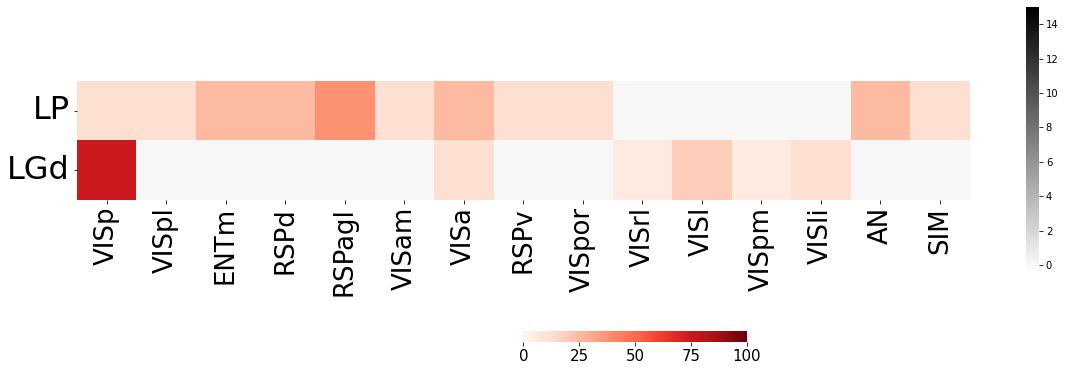

In [131]:
plt.figure(figsize=(20,7))
ax=sns.heatmap(count_table*100,square=True,vmin=0,vmax=100,cmap='Reds',cbar_kws={"orientation":"horizontal","shrink":0.2})
ax=sns.heatmap(count_table,mask=count_table>0,cmap='gist_gray_r',vmin=-0.5,vmax=15,square=True)
ax.set_yticklabels(['LP','LGd'],rotation=0)
plt.xticks(fontsize=26,rotation=90)
plt.yticks(fontsize=32)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.savefig(f'LP_LGd_R.png',bbox_inches='tight',pad_inches=0.2,dpi=800)

In [11]:
### layer SSp
ssp_layer=pd.read_csv("2023/SSp_layer.txt",sep=" ",header=None)

In [12]:
ssp_layer.columns=['name','1','2/3','4','5','6a','6b','Non-cortical']

In [13]:
ssp_arbor_layer=pd.read_csv("2023/SSp_arbors_layer.txt",header=None,sep=" ")

In [14]:
ssp_arbor_layer.columns=['name','1','2/3','4','5','6a','6b','Non-cortical']

In [15]:
namelist=[]
ai=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
for i in range(len(ssp_arbor_layer)):
    name=ssp_arbor_layer['name'][i][:-2]
    namelist.append(name)
    ai.append(ssp_arbor_layer['name'][i][-1])
    if ssp_arbor_layer['1'][i]>1000:
        l1.append(1)
    else:
        l1.append(0)
    if ssp_arbor_layer['2/3'][i]>1000:
        l2.append(1)
    else:
        l2.append(0)
    if ssp_arbor_layer['4'][i]>1000:
        l3.append(1)
    else:
        l3.append(0)
    if ssp_arbor_layer['5'][i]>1000:
        l4.append(1)
    else:
        l4.append(0)
    if ssp_arbor_layer['6a'][i]>1000:
        l5.append(1)
    else:
        l5.append(0)
    if ssp_arbor_layer['6b'][i]>1000:
        l6.append(1)
    else:
        l6.append(0)

In [16]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
for i in range(len(ssp_arbor_layer)):
    if ssp_arbor_layer['1'][i]>1000:
        p1.append(ssp_arbor_layer['1'][i])
    else:
        p1.append(0)
    if ssp_arbor_layer['2/3'][i]>1000:
        p2.append(ssp_arbor_layer['2/3'][i])
    else:
        p2.append(0)
    if ssp_arbor_layer['4'][i]>1000:
        p3.append(ssp_arbor_layer['4'][i])
    else:
        p3.append(0)
    if ssp_arbor_layer['5'][i]>1000:
        p4.append(ssp_arbor_layer['5'][i])
    else:
        p4.append(0)
    if ssp_arbor_layer['6a'][i]>1000:
        p5.append(ssp_arbor_layer['6a'][i])
    else:
        p5.append(0)
    if ssp_arbor_layer['6b'][i]>1000:
        p6.append(ssp_arbor_layer['6b'][i])
    else:
        p6.append(0)

In [17]:
ssp_table=pd.DataFrame({'name':namelist,'arbor_id':ai,'1':l1,'2/3':l2,'4':l3,'5':l4,'6a':l5,'6b':l6})

In [18]:
ssp_table['p1']=p1
ssp_table['p2/3']=p2
ssp_table['p4']=p3
ssp_table['p5']=p4
ssp_table['p6a']=p5
ssp_table['p6b']=p6

In [43]:
ssp_ctype=[]
ssp_DL=[]
ssp_order=[]
ssp_ptype=[]

for i in range(len(ssp_table)):
    name=str(ssp_table['name'][i])[:-5]
    aid=ssp_table['arbor_id'][i]
    line_id=table[table['Name']==name].index[0]
    ssp_ctype.append(table['Soma_region'][line_id])
    ssp_ptype.append(table['Cortical_layer'][line_id])
    line_id2=axonF[(axonF['name']==name)&(axonF['arbor_id']==int(aid))].index[0]
    ssp_DL.append(LD_marker[line_id2])
    ssp_order.append(arbor_order[line_id2])

In [20]:
ssp_table2=ssp_table.copy()
ssp_table2=ssp_table2[~((ssp_table2['p1']==0)&(ssp_table2['p2/3']==0)&(ssp_table2['p4']==0)&
                      (ssp_table2['p5']==0)&(ssp_table2['p6a']==0)&(ssp_table2['p6b']==0))]

In [21]:
ssp_table2=ssp_table2.reset_index(drop=True)

In [44]:
ssp_ctype2=[]
ssp_DL2=[]
ssp_order2=[]
ssp_ptype2=[]

for i in range(len(ssp_table2)):
    name=str(ssp_table2['name'][i])[:-5]
    aid=ssp_table2['arbor_id'][i]
    line_id=axonF[(axonF['name']==name)&(axonF['arbor_id']==int(aid))].index[0]
    ssp_DL2.append(LD_marker[line_id])
    ssp_order2.append(arbor_order[line_id])
    line_id2=table[table['Name']==name].index[0]
    ssp_ctype2.append(table['Soma_region'][line_id2])
    ssp_ptype2.append(table['Cortical_layer'][line_id2])

In [46]:
ssp_ctype=np.array(ssp_ctype)
ssp_DL=np.array(ssp_DL)
ssp_order=np.array(ssp_order)
ssp_ptype=np.array(ssp_ptype)

In [47]:
ssp_ctype2=np.array(ssp_ctype2)
ssp_DL2=np.array(ssp_DL2)
ssp_order2=np.array(ssp_order2)
ssp_ptype2=np.array(ssp_ptype2)

In [18]:
ssp_class=['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un']

In [53]:
## projection over layers
ssp_proj_table=[]
for i in ssp_class:
    result=[]
    lines=ssp_table2[ssp_ctype2==i]
    result.append(lines['p1'].mean())
    result.append(lines['p2/3'].mean())
    result.append(lines['p4'].mean())
    result.append(lines['p5'].mean())
    result.append(lines['p6a'].mean())
    result.append(lines['p6b'].mean())
    ssp_proj_table.append(result)
ssp_proj_table=np.array(ssp_proj_table)

In [175]:
from sklearn.preprocessing import MinMaxScaler
from webcolors import rgb_to_name

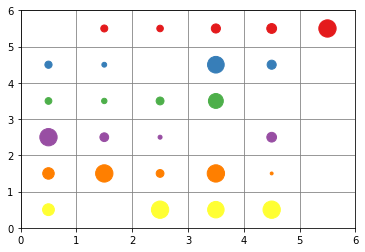

In [93]:
## projection vs ctype
ssp_proj_R=ssp_proj_table.copy()
ssp_proj_Rscale=MinMaxScaler().fit_transform(ssp_proj_R)

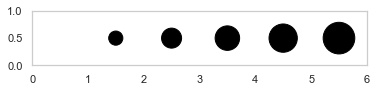

In [213]:
X=[0.5+i for i in range(6)]
plt.figure(figsize=(6,1))
plt.scatter(X,[0+0.5 for i in range(6)],s=np.array([0,0.2,0.4,0.6,0.8,1])*1000,c='black')    
plt.xlim(0,6)
plt.ylim(0,1)
plt.grid(None)

In [30]:
ssp_S=pd.read_csv("2023/ssp_stype_proj.txt",sep=" ",header=None)
ssp_S=np.array(ssp_S)

In [248]:
from matplotlib.pyplot import MultipleLocator

In [29]:
ssp_S=np.delete(ssp_S,11,axis=1)

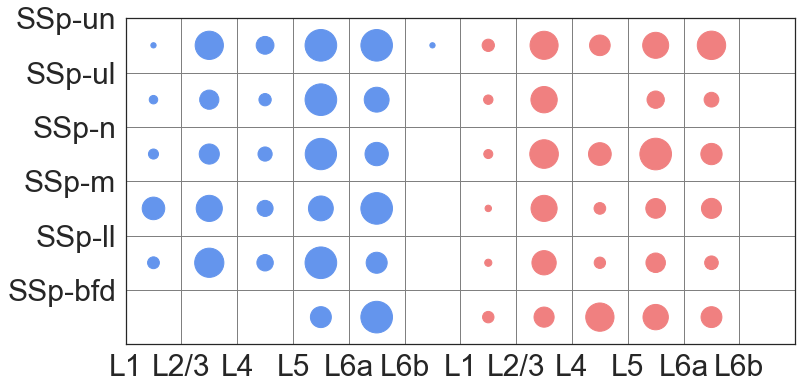

In [131]:
X1=[0.5+i for i in range(6)]
X2=[0.5+i for i in range(6,12)]
plt.figure(figsize=(12,6))
for i in range(6):
    plt.scatter(X1,[(5.5-i) for j in range(6)],s=ssp_S[i,:6]*1000,c='cornflowerblue')    
    plt.scatter(X2,[(5.5-i) for j in range(6)],s=ssp_S[i,6:]*1000,c='lightcoral') 
    
plt.xlim(0,12)
plt.ylim(0,6)
x = MultipleLocator(1)    # x轴每10一个刻度
y = MultipleLocator(1)    # y轴每15一个刻度
ax = plt.gca()
ax.xaxis.set_major_locator(x)
ax.yaxis.set_major_locator(y)
X=[i for i in range(12)]
Y=[i+1 for i in range(6)]
plt.xticks(X,["L1","L2/3","L4","L5","L6a","L6b","L1","L2/3","L4","L5","L6a","L6b"],fontsize=30)
plt.yticks(Y,ssp_class,fontsize=30)

plt.grid(True, color='gray',which='major')
plt.savefig(f'ssp_proj_R.png',bbox_inches='tight',pad_inches=0.2,dpi=600)


In [36]:
ssp_L=pd.read_csv("2023/ssp_layer_proj.txt",sep=" ",header=None)
ssp_L=np.array(ssp_L)

In [38]:
ssp_L

array([[0.31361347, 0.78476994, 0.31409984, 0.43676315, 0.18451963,
        0.        , 0.05972656, 1.        , 0.23130948, 0.63530942,
        0.2904683 , 0.        ],
       [0.07468937, 1.        , 0.26650216, 0.07738746, 0.01531179,
        0.        , 0.00769571, 0.27698625, 0.1561763 , 0.16651139,
        0.05975731, 0.        ],
       [0.03157339, 0.10431086, 0.10014456, 1.        , 0.77003978,
        0.        , 0.18306733, 0.35027669, 0.30275083, 0.90573272,
        0.85949053, 0.01476988],
       [0.        , 0.18283767, 0.21574542, 0.72677141, 0.1503374 ,
        0.        , 0.        , 0.38175416, 0.        , 1.        ,
        0.35344336, 0.        ]])

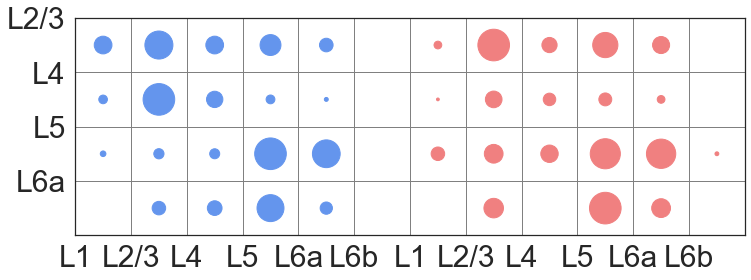

In [132]:
X1=[0.5+i for i in range(6)]
X2=[0.5+i for i in range(6,12)]
plt.figure(figsize=(12,4))
for i in range(4):
    plt.scatter(X1,[(3.5-i) for j in range(6)],s=ssp_L[i,:6]*1000,c='cornflowerblue')    
    plt.scatter(X2,[(3.5-i) for j in range(6)],s=ssp_L[i,6:]*1000,c='lightcoral') 
    
plt.xlim(0,12)
plt.ylim(0,4)
x = MultipleLocator(1)    # x轴每10一个刻度
y = MultipleLocator(1)    # y轴每15一个刻度
ax = plt.gca()
ax.xaxis.set_major_locator(x)
ax.yaxis.set_major_locator(y)
X=[i for i in range(12)]
Y=[i+1 for i in range(4)]
plt.xticks(X,["L1","L2/3","L4","L5","L6a","L6b","L1","L2/3","L4","L5","L6a","L6b"],fontsize=30)
plt.yticks(Y,["L6a","L5","L4","L2/3"],fontsize=30)

plt.grid(True, color='gray',which='major')
plt.savefig(f'ssp_proj_L.png',bbox_inches='tight',pad_inches=0.2,dpi=600)


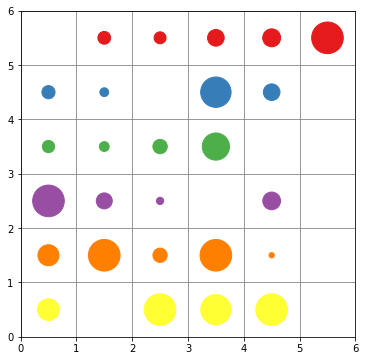

In [112]:
X=[0.5+i for i in range(6)]
plt.figure(figsize=(6,6))
with sns.color_palette("Set1"):
    for i in range(6):
        plt.scatter(X,[(5.5-i) for j in range(6)],s=ssp_proj_Rscale[i,:]*1000)      
plt.xlim(0,6)
plt.ylim(0,6)
#plt.xticks(X,["L1","L2/3","L4","L5","L6a","L6b"],fontsize=15)
#plt.yticks(X,ssp_class,fontsize=15)

plt.grid(True, color='gray',which='major')
plt.savefig(f'ssp_proj_R.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [116]:
ssp_layerR=["2/3","4","5","6a"]

In [117]:
ssp_proj_table2=[]
for i in ssp_layerR:
    result=[]
    lines=ssp_table2[ssp_ptype2==i]
    result.append(lines['p1'].mean())
    result.append(lines['p2/3'].mean())
    result.append(lines['p4'].mean())
    result.append(lines['p5'].mean())
    result.append(lines['p6a'].mean())
    result.append(lines['p6b'].mean())
    ssp_proj_table2.append(result)
ssp_proj_table2=np.array(ssp_proj_table2)

In [118]:
## projection vs ctype
ssp_proj_R2=ssp_proj_table2.copy()
ssp_proj_Rscale2=MinMaxScaler().fit_transform(ssp_proj_R2)

In [124]:
from pylab import xticks,yticks,np

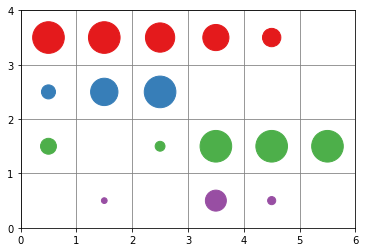

In [126]:
X=[0.5+i for i in range(6)]
plt.figure(figsize=(6,4))
with sns.color_palette("Set1"):
    for i in range(4):
        plt.scatter(X,[(3.5-i) for j in range(6)],s=ssp_proj_Rscale2[i,:]*1000)      
plt.xlim(0,6)
plt.ylim(0,4)
#plt.xticks(X,["L1","L2/3","L4","L5","L6a","L6b"],fontsize=15)
#plt.yticks(X,ssp_class,fontsize=15)
xticks(np.linspace(0,6,7,endpoint=True))
yticks(np.linspace(0,4,5,endpoint=True))
plt.grid(True, color='gray')
plt.savefig(f'ssp_proj_L.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [84]:
from scipy.interpolate import make_interp_spline

In [732]:
x_smooth = np.linspace(min(X), max(X), 400)
y1 = make_interp_spline(X, ssp_proj_table[0,:])(x_smooth)
y2 = make_interp_spline(X, ssp_proj_table[1,:])(x_smooth)
y3 = make_interp_spline(X, ssp_proj_table[2,:])(x_smooth)
y4 = make_interp_spline(X, ssp_proj_table[3,:])(x_smooth)
y5 = make_interp_spline(X, ssp_proj_table[4,:])(x_smooth)
y6 = make_interp_spline(X, ssp_proj_table[5,:])(x_smooth)

[Text(0, 0, 'SSp-bfd'),
 Text(1, 0, 'SSp-ll'),
 Text(2, 0, 'SSp-m'),
 Text(3, 0, 'SSp-n'),
 Text(4, 0, 'SSp-ul'),
 Text(5, 0, 'SSp-un')]

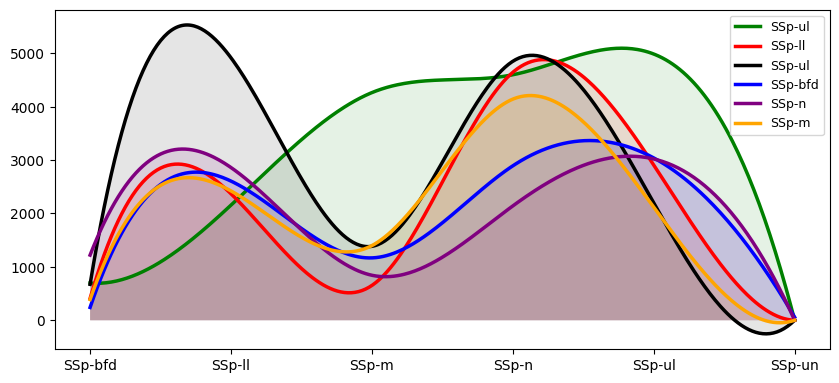

In [766]:
fig, ax = plt.subplots(1,figsize=(10,4.5),dpi=100)
X=[i for i in range(6)]
ax.plot(x_smooth,y6,label='SSp-ul',c='green',linewidth=2.5)
ax.fill_between(x_smooth,y6, facecolor='green', alpha=0.1)
ax.plot(x_smooth,y2,label='SSp-ll',c='red',linewidth=2.5)
ax.fill_between(x_smooth,y2, facecolor='red', alpha=0.1)
ax.plot(x_smooth,y5,label='SSp-ul',c='black',linewidth=2.5)
ax.fill_between(x_smooth,y5, facecolor='black', alpha=0.1)
ax.plot(x_smooth,y1,label='SSp-bfd',c='blue',linewidth=2.5)
ax.fill_between(x_smooth,y1, facecolor='blue', alpha=0.1)
ax.plot(x_smooth,y4,label='SSp-n',c='purple',linewidth=2.5)
ax.fill_between(x_smooth,y4, facecolor='purple', alpha=0.1)
ax.plot(x_smooth,y3,label='SSp-m',c='orange',linewidth=2.5)
ax.fill_between(x_smooth,y3, facecolor='orange', alpha=0.1)
plt.legend(fontsize=9)
ax.set_xticks(X)
ax.set_xticklabels(['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un'])

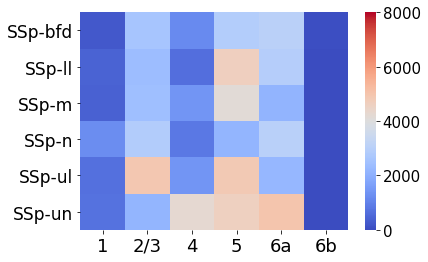

In [1028]:
sns.heatmap(ssp_proj_table,cmap='coolwarm',xticklabels=['1','2/3','4','5','6a','6b'],
            yticklabels=['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un'],vmin=0,vmax=8000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.savefig(f'SSp_proj.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [767]:
## projection over layers Local
ssp_table3=ssp_table2.copy()
ssp_table3=ssp_table3[ssp_DL2==0]

In [768]:
ssp_proj_table_local=[]
for i in ssp_class:
    result=[]
    lines=ssp_table3[ssp_ctype2[ssp_DL2==0]==i]
    result.append(lines['p1'].mean())
    result.append(lines['p2/3'].mean())
    result.append(lines['p4'].mean())
    result.append(lines['p5'].mean())
    result.append(lines['p6a'].mean())
    result.append(lines['p6b'].mean())
    ssp_proj_table_local.append(result)
ssp_proj_table_local=np.array(ssp_proj_table_local)

In [770]:
y1 = make_interp_spline(X, ssp_proj_table_local[0,:])(x_smooth)
y2 = make_interp_spline(X, ssp_proj_table_local[1,:])(x_smooth)
y3 = make_interp_spline(X, ssp_proj_table_local[2,:])(x_smooth)
y4 = make_interp_spline(X, ssp_proj_table_local[3,:])(x_smooth)
y5 = make_interp_spline(X, ssp_proj_table_local[4,:])(x_smooth)
y6 = make_interp_spline(X, ssp_proj_table_local[5,:])(x_smooth)

[Text(0, 0, 'SSp-bfd'),
 Text(1, 0, 'SSp-ll'),
 Text(2, 0, 'SSp-m'),
 Text(3, 0, 'SSp-n'),
 Text(4, 0, 'SSp-ul'),
 Text(5, 0, 'SSp-un')]

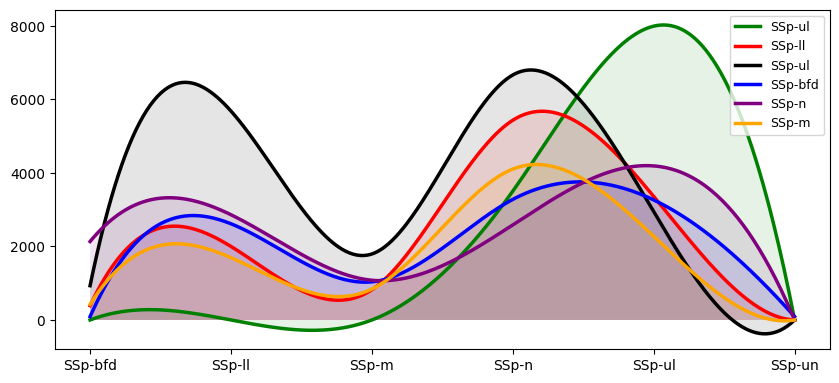

In [771]:
fig, ax = plt.subplots(1,figsize=(10,4.5),dpi=100)
X=[i for i in range(6)]
ax.plot(x_smooth,y6,label='SSp-ul',c='green',linewidth=2.5)
ax.fill_between(x_smooth,y6, facecolor='green', alpha=0.1)
ax.plot(x_smooth,y2,label='SSp-ll',c='red',linewidth=2.5)
ax.fill_between(x_smooth,y2, facecolor='red', alpha=0.1)
ax.plot(x_smooth,y5,label='SSp-ul',c='black',linewidth=2.5)
ax.fill_between(x_smooth,y5, facecolor='black', alpha=0.1)
ax.plot(x_smooth,y1,label='SSp-bfd',c='blue',linewidth=2.5)
ax.fill_between(x_smooth,y1, facecolor='blue', alpha=0.1)
ax.plot(x_smooth,y4,label='SSp-n',c='purple',linewidth=2.5)
ax.fill_between(x_smooth,y4, facecolor='purple', alpha=0.1)
ax.plot(x_smooth,y3,label='SSp-m',c='orange',linewidth=2.5)
ax.fill_between(x_smooth,y3, facecolor='orange', alpha=0.1)
plt.legend(fontsize=9)
ax.set_xticks(X)
ax.set_xticklabels(['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un'])

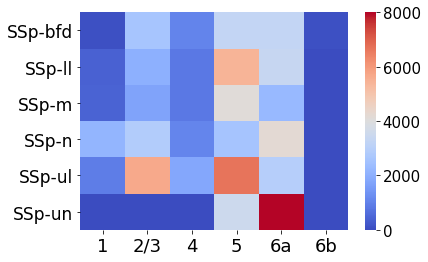

In [1038]:
sns.heatmap(ssp_proj_table_local,cmap='coolwarm',xticklabels=['1','2/3','4','5','6a','6b'],
            yticklabels=['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un'],vmin=0,vmax=8000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.savefig(f'SSp_proj_local.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [773]:
## projection over layers Distal
ssp_table4=ssp_table2.copy()
ssp_table4=ssp_table4[ssp_DL2==1]

In [774]:
ssp_proj_table_distal=[]
for i in ssp_class:
    result=[]
    lines=ssp_table4[ssp_ctype2[ssp_DL2==1]==i]
    result.append(lines['p1'].mean())
    result.append(lines['p2/3'].mean())
    result.append(lines['p4'].mean())
    result.append(lines['p5'].mean())
    result.append(lines['p6a'].mean())
    result.append(lines['p6b'].mean())
    ssp_proj_table_distal.append(result)
ssp_proj_table_distal=np.array(ssp_proj_table_distal)

In [775]:
y1 = make_interp_spline(X, ssp_proj_table_distal[0,:])(x_smooth)
y2 = make_interp_spline(X, ssp_proj_table_distal[1,:])(x_smooth)
y3 = make_interp_spline(X, ssp_proj_table_distal[2,:])(x_smooth)
y4 = make_interp_spline(X, ssp_proj_table_distal[3,:])(x_smooth)
y5 = make_interp_spline(X, ssp_proj_table_distal[4,:])(x_smooth)
y6 = make_interp_spline(X, ssp_proj_table_distal[5,:])(x_smooth)

[Text(0, 0, 'SSp-bfd'),
 Text(1, 0, 'SSp-ll'),
 Text(2, 0, 'SSp-m'),
 Text(3, 0, 'SSp-n'),
 Text(4, 0, 'SSp-ul'),
 Text(5, 0, 'SSp-un')]

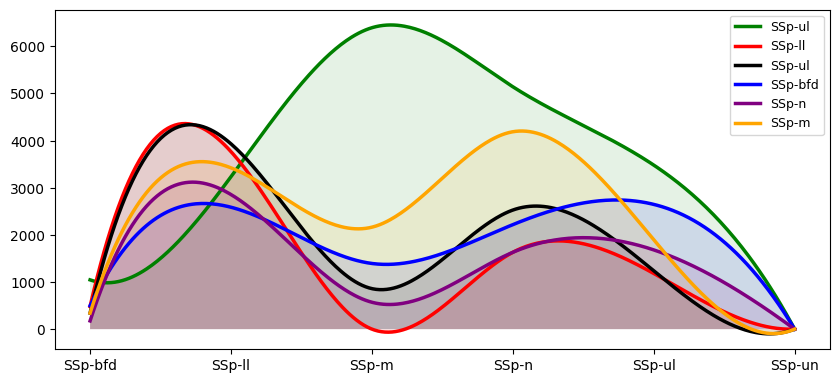

In [776]:
fig, ax = plt.subplots(1,figsize=(10,4.5),dpi=100)
X=[i for i in range(6)]
ax.plot(x_smooth,y6,label='SSp-ul',c='green',linewidth=2.5)
ax.fill_between(x_smooth,y6, facecolor='green', alpha=0.1)
ax.plot(x_smooth,y2,label='SSp-ll',c='red',linewidth=2.5)
ax.fill_between(x_smooth,y2, facecolor='red', alpha=0.1)
ax.plot(x_smooth,y5,label='SSp-ul',c='black',linewidth=2.5)
ax.fill_between(x_smooth,y5, facecolor='black', alpha=0.1)
ax.plot(x_smooth,y1,label='SSp-bfd',c='blue',linewidth=2.5)
ax.fill_between(x_smooth,y1, facecolor='blue', alpha=0.1)
ax.plot(x_smooth,y4,label='SSp-n',c='purple',linewidth=2.5)
ax.fill_between(x_smooth,y4, facecolor='purple', alpha=0.1)
ax.plot(x_smooth,y3,label='SSp-m',c='orange',linewidth=2.5)
ax.fill_between(x_smooth,y3, facecolor='orange', alpha=0.1)
plt.legend(fontsize=9)
ax.set_xticks(X)
ax.set_xticklabels(['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un'])

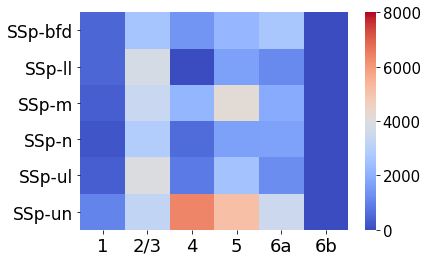

In [1030]:
sns.heatmap(ssp_proj_table_distal,cmap='coolwarm',xticklabels=['1','2/3','4','5','6a','6b'],
            yticklabels=['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un'],vmin=0,vmax=8000)
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.savefig(f'SSp_proj_distal.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [1034]:
ssp_proj_all=np.vstack((ssp_proj_table,ssp_proj_table_local,ssp_proj_table_distal))

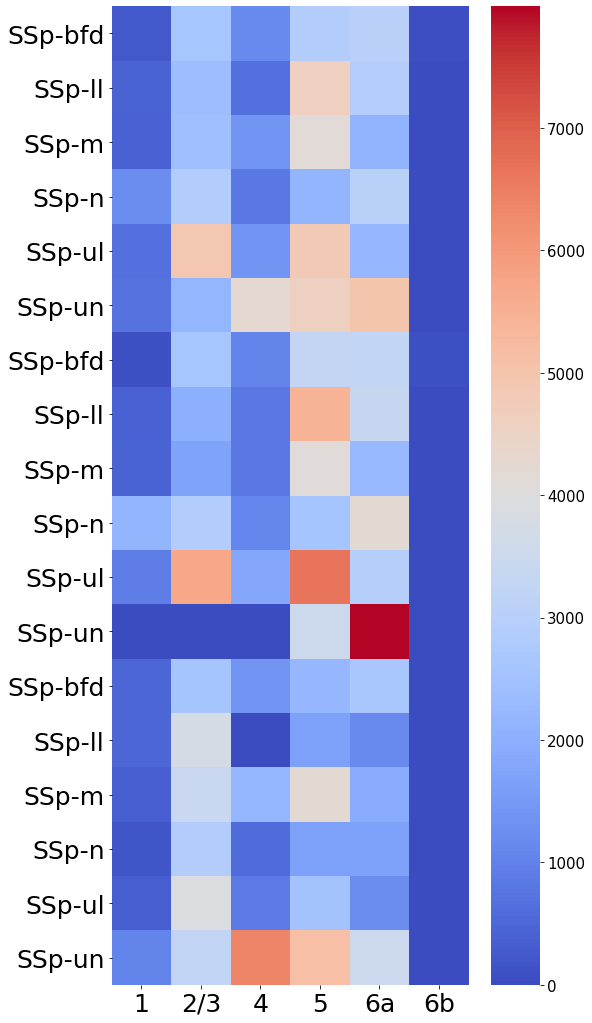

In [1042]:
plt.figure(figsize=(8,18))
sns.heatmap(ssp_proj_all,cmap='coolwarm',xticklabels=['1','2/3','4','5','6a','6b'],
            yticklabels=['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un',
                         'SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un',
                        'SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig(f'SSp_proj_all.png',bbox_inches='tight',pad_inches=0.2,dpi=600)

In [ ]:
#### 投射量和ssp的subtype之间的关系


In [30]:
len(fulltable[fulltable['Manually_corrected_soma_region']=='SSp-un'])

11

In [2]:
fulltable=pd.read_excel('/Users/krystal/Desktop/project/1741_final.xlsx',header=1)

In [32]:
#ssp_class=['SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-ul','SSp-un','Others']
ssp_classes=[]
for i in range(len(ssp_table)):
    name=ssp_table['name'][i]
    line=table[table['name']==name]
    line=line.reset_index(drop=True)
    ssp_classes.append(line['region'].iloc[0])

In [33]:
ssp_table['region']=ssp_classes

In [48]:
layerlist=[]
for i in list(ssp_table['name']):
    line=fulltable[fulltable['Cell name']==i]
    if len(line)>0:
        line=line.reset_index(drop=True)
        l=line['Cortical_layer'][0]
        layerlist.append(l)
    else:
        layerlist.append('nan')

In [51]:
ssp_table['cortical_layer']=layerlist

In [52]:
sump=[]
for i in range(len(ssp_table)):
    s=ssp_table['p1'][i]+ssp_table['p2/3'][i]+ssp_table['p4'][i]+ssp_table['p5'][i]+ssp_table['p6a'][i]+ssp_table['p6b'][i]
    sump.append(s)

In [53]:
ssp_table['sum_projection']=sump

In [54]:
sspbfd=ssp_table[(ssp_table['region']=='SSp-bfd')&(ssp_table['cortical_layer']=='2/3')]

In [55]:
import numpy as np

In [260]:
sspbfd[sspbfd['distal/local']==1][['1', '2/3', '4', '5', '6a', '6b']].drop_duplicates().values

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [266]:
sspbfd.columns

Index(['name', 'arbor_id', '1', '2/3', '4', '5', '6a', '6b', 'distal/local',
       'arbor_order', 'region', 'p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b'],
      dtype='object')

In [56]:
### 平均的投射量
d1=list(sspbfd[sspbfd['distal/local']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d1=[i/len(sspbfd[(sspbfd['distal/local']==1)&(sspbfd['sum_projection']!=0)]) for i in d1]

In [647]:
sspbfd

,name,arbor_id,1,2/3,4,5,6a,6b,distal/local,arbor_order,region,p1,p2/3,p4,p5,p6a,p6b
0,191807_5178_x5002_y23078,0,0,0,0,0,0,0,0,1,SSp-bfd,0.0,0.0,0.0,0.0,0.000000,0.0
1,191807_5178_x5002_y23078,1,0,0,0,0,0,0,0,0,SSp-bfd,0.0,0.0,0.0,0.0,0.000000,0.0
6,18867_5942_x29015_y5711,0,0,0,0,0,0,0,1,1,SSp-bfd,0.0,0.0,0.0,0.0,0.000000,0.0
7,18867_5942_x29015_y5711,1,0,0,0,0,1,0,0,0,SSp-bfd,0.0,0.0,0.0,0.0,3877.593303,0.0
8,18453_4725_x30684_y6703,0,0,0,0,0,0,0,0,0,SSp-bfd,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,18461_5025_x23630_y4542,1,0,0,0,0,1,0,1,1,SSp-bfd,0.0,0.0,0.0,0.0,3836.333791,0.0
509,18868_5456_x7773_y6771,0,0,0,0,0,0,0,0,0,SSp-bfd,0.0,0.0,0.0,0.0,0.000000,0.0
510,18868_5456_x7773_y6771,1,0,0,0,0,0,0,1,1,SSp-bfd,0.0,0.0,0.0,0.0,0.000000,0.0
549,18869_5553_x7275_y3994,0,0,0,0,0,0,0,0,1,SSp-bfd,0.0,0.0,0.0,0.0,0.000000,0.0


In [57]:
d2=list(sspbfd[sspbfd['distal/local']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d2=[i/len(sspbfd[(sspbfd['distal/local']==0)&(sspbfd['sum_projection']!=0)]) for i in d2]

In [58]:
d3=list(sspbfd[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d3=[i/len(sspbfd[sspbfd['sum_projection']!=0]) for i in d3]

In [78]:
### heatmap
#d=[d3,d2,d1]
d=[d2,d1]

In [79]:
d=pd.DataFrame(d)
d.columns=['1', '2/3', '4', '5', '6a', '6b']

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Overall'), Text(0, 1.5, 'Local'), Text(0, 2.5, 'Distal')])

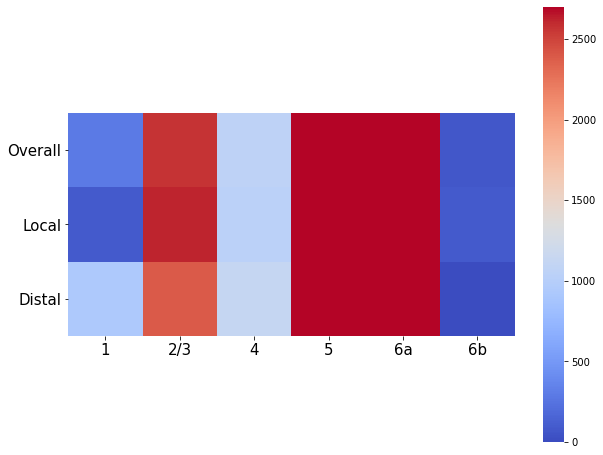

In [668]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d,cmap='coolwarm',square=True,vmin=0,vmax=2700)
ax.set_yticklabels(['Overall','Local','Distal'],rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [80]:
### 平均的投射量
ss=ssp_table[(ssp_table['region']=='SSp-ll')&(ssp_table['cortical_layer']=='2/3')]
#d1=list(ss[ss['arbor_order']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
#d1=[i/len(ss[(ss['arbor_order']==0)&(ss['sum_projection']!=0)]) for i in d1]
d2=list(ss[ss['arbor_order']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d2=[i/len(ss[(ss['arbor_order']==1)&(ss['sum_projection']!=0)]) for i in d2]
d3=list(ss[ss['arbor_order']==2][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d3=[i/len(ss[(ss['arbor_order']==2)&(ss['sum_projection']!=0)]) for i in d3]
d4=list(ss[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d4=[i/len(ss[ss['sum_projection']!=0]) for i in d4]

In [81]:
#e=[d4,d1,d2,d3]
e=[d2,d3]
e=pd.DataFrame(e)
e.columns=['1', '2/3', '4', '5', '6a', '6b']

In [696]:
e

,1,2/3,4,5,6a,6b
0,321.763885,1853.833522,679.850778,4844.037170,3033.236379,0.0
1,588.178527,2931.072623,749.799490,7905.186899,4871.695862,0.0
2,0.000000,1215.917899,820.851581,3086.769885,1764.854801,0.0
3,421.392521,1063.051261,300.141649,2497.048771,2007.096151,0.0


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Overall'),
  Text(0, 1.5, 'Distal1'),
  Text(0, 2.5, 'Distal2'),
  Text(0, 3.5, 'Distal3')])

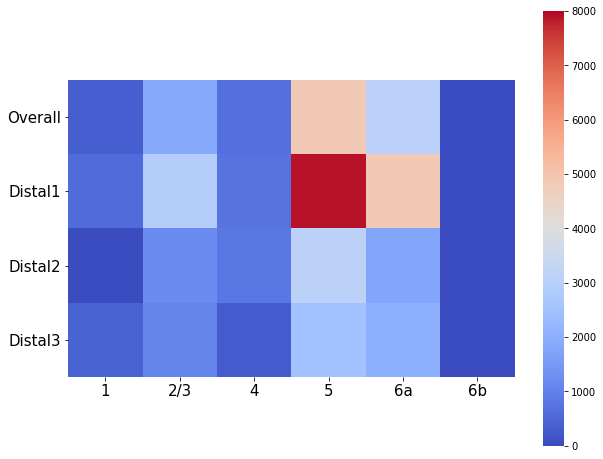

In [687]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(e,cmap='coolwarm',square=True,vmin=0,vmax=8000)
ax.set_yticklabels(['Overall','Distal1','Distal2','Distal3'],rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [82]:
ss=ssp_table[(ssp_table['region']=='SSp-m')&(ssp_table['cortical_layer']=='2/3')]
d1=list(ss[ss['distal/local']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d1=[i/len(ss[(ss['distal/local']==1)&(ss['sum_projection']!=0)]) for i in d1]
d2=list(ss[ss['distal/local']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d2=[i/len(ss[(ss['distal/local']==0)&(ss['sum_projection']!=0)]) for i in d2]
d3=list(ss[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d3=[i/len(ss[ss['sum_projection']!=0]) for i in d3]
#f=[d3,d2,d1]
f=[d2,d1]
f=pd.DataFrame(f)
f.columns=['1', '2/3', '4', '5', '6a', '6b']

In [693]:
f

,1,2/3,4,5,6a,6b
0,441.558365,2450.644252,959.516356,3974.151858,2005.376144,0.0
1,409.655969,2130.012559,740.274099,3938.524962,1992.564819,0.0
2,519.320456,3232.184006,1493.919356,4060.992416,2036.603750,0.0


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Overall'), Text(0, 1.5, 'Local'), Text(0, 2.5, 'Distal')])

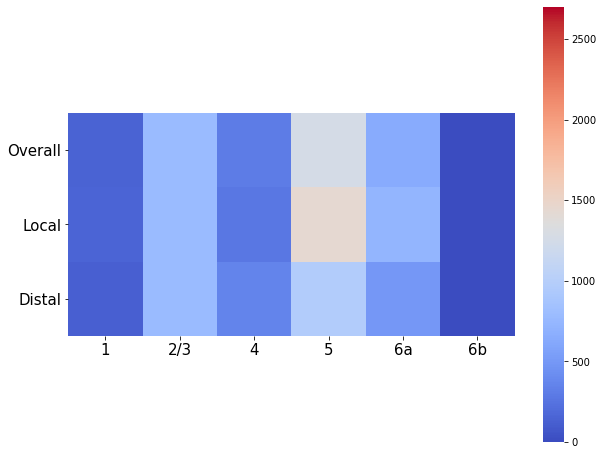

In [551]:
### 平均的投射量
ss=ssp_table[ssp_table['region']=='SSp-m']
d1=list(ss[ss['distal/local']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d2=list(ss[ss['distal/local']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d3=list(ss[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d=[d3,d2,d1]
d=pd.DataFrame(d)
d.columns=['1', '2/3', '4', '5', '6a', '6b']
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d,cmap='coolwarm',square=True,vmin=0,vmax=2700)
ax.set_yticklabels(['Overall','Local','Distal'],rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [83]:
ss=ssp_table[(ssp_table['region']=='SSp-n')&(ssp_table['cortical_layer']=='2/3')]
#d1=list(ss[ss['distal/local']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
#d1=[i/len(ss[(ss['distal/local']==1)&(ss['sum_projection']!=0)]) for i in d1]
d2=list(ss[ss['distal/local']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d2=[i/len(ss[(ss['distal/local']==0)&(ss['sum_projection']!=0)]) for i in d2]
d3=list(ss[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d3=[i/len(ss[ss['sum_projection']!=0]) for i in d3]
#g=[d3,d2,d1]
g=[d2]
g=pd.DataFrame(g)
g.columns=['1', '2/3', '4', '5', '6a', '6b']

In [698]:
g

,1,2/3,4,5,6a,6b
0,1219.604686,2037.922968,576.435626,2718.630445,3343.259794,0.0
1,1707.775051,2290.540715,864.653439,2857.227048,3838.408179,0.0
2,243.263957,1532.687472,0.000000,2441.437238,2352.963025,0.0


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Overall'), Text(0, 1.5, 'Local'), Text(0, 2.5, 'Distal')])

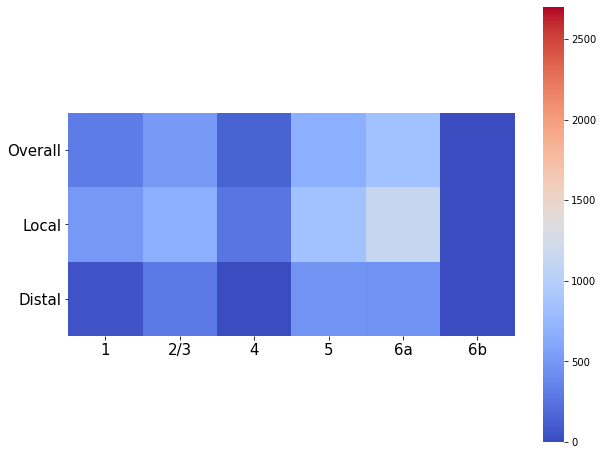

In [552]:
### 平均的投射量
ss=ssp_table[ssp_table['region']=='SSp-n']
d1=list(ss[ss['distal/local']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d2=list(ss[ss['distal/local']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d3=list(ss[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d=[d3,d2,d1]
d=pd.DataFrame(d)
d.columns=['1', '2/3', '4', '5', '6a', '6b']
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d,cmap='coolwarm',square=True,vmin=0,vmax=2700)
ax.set_yticklabels(['Overall','Local','Distal'],rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [84]:
ss=ssp_table[(ssp_table['region']=='SSp-ul')&(ssp_table['cortical_layer']=='2/3')]
#d1=list(ss[ss['arbor_order']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
#d1=[i/len(ss[(ss['arbor_order']==0)&(ss['sum_projection']!=0)]) for i in d1]
d2=list(ss[ss['arbor_order']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d2=[i/len(ss[(ss['arbor_order']==1)&(ss['sum_projection']!=0)]) for i in d2]
d3=list(ss[ss['arbor_order']==2][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d3=[i/len(ss[(ss['arbor_order']==2)&(ss['sum_projection']!=0)]) for i in d3]
d4=list(ss[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].sum())
d4=[i/len(ss[ss['sum_projection']!=0]) for i in d4]
#h=[d4,d1,d2,d3]
h=[d2,d3]
h=pd.DataFrame(h)
h.columns=['1', '2/3', '4', '5', '6a', '6b']

In [700]:
h

,1,2/3,4,5,6a,6b
0,725.382888,4498.782223,1317.956007,4812.619133,2396.104185,0.0
1,1189.035317,5728.818896,1959.565778,6612.963986,3164.958047,0.0
2,152.647572,3332.286169,494.263992,4879.217302,2231.798448,0.0
3,471.520673,3608.116454,985.815240,2417.338529,1491.791126,0.0


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Overall'),
  Text(0, 1.5, 'Distal1'),
  Text(0, 2.5, 'Distal2'),
  Text(0, 3.5, 'Distal3')])

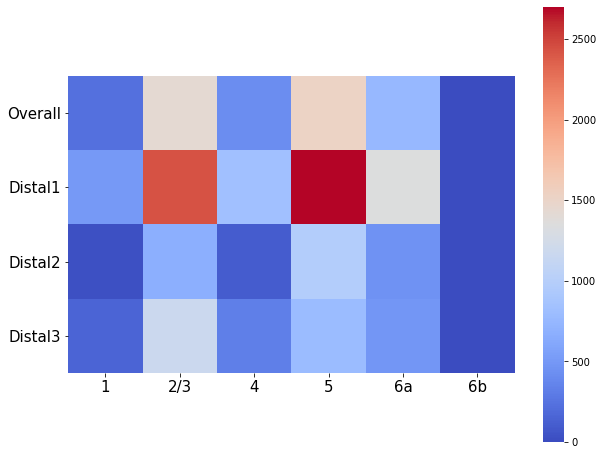

In [603]:
### 平均的投射量
ss=ssp_table[ssp_table['region']=='SSp-ul']
d1=list(ss[ss['arbor_order']==0][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d2=list(ss[ss['arbor_order']==1][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d3=list(ss[ss['arbor_order']==2][['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d4=list(ss[['p1', 'p2/3', 'p4', 'p5', 'p6a', 'p6b']].mean())
d=[d4,d1,d2,d3]
d=pd.DataFrame(d)
d.columns=['1', '2/3', '4', '5', '6a', '6b']
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d,cmap='coolwarm',square=True,vmin=0,vmax=2700)
ax.set_yticklabels(['Overall','Distal1','Distal2','Distal3'],rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [617]:
ss=ssp_table[ssp_table['region']=='SSp-un']

In [619]:
ss=ssp_table[(ssp_table['region'].str.contains('SSp'))&(ssp_table[''])]

22

In [85]:
overall=pd.concat([d*2,f*2,g*2,e,h],axis=0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Local'),
  Text(0, 1.5, 'Distal'),
  Text(0, 2.5, 'Local'),
  Text(0, 3.5, 'Distal'),
  Text(0, 4.5, 'Local'),
  Text(0, 5.5, 'Distal2'),
  Text(0, 6.5, 'Distal3'),
  Text(0, 7.5, 'Distal1'),
  Text(0, 8.5, 'Distal2')])

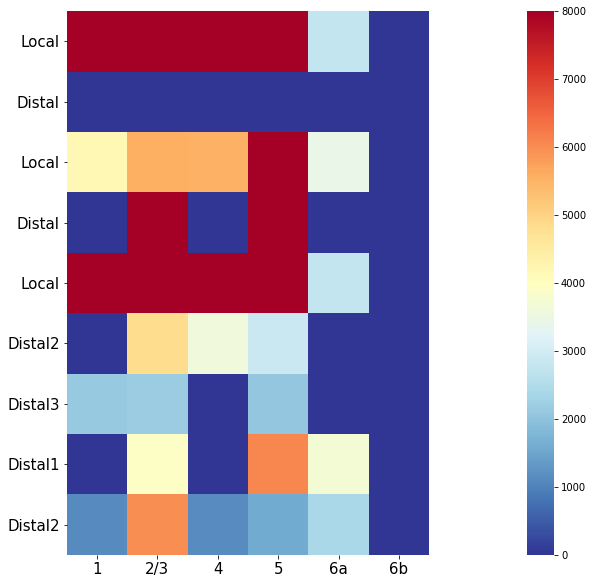

In [86]:
#yt=['Overall','Local','Distal','Overall','Local','Distal',
    #'Overall','Local','Distal','Overall','Distal1','Distal2','Distal3','Overall','Local','Distal1','Distal2']
yt=['Local','Distal','Local','Distal','Local','Distal2','Distal3','Distal1','Distal2']
fig,ax=plt.subplots(figsize=(35,10))
sns.heatmap(overall,cmap='RdYlBu_r',square=True,vmin=0,vmax=8000)
ax.set_yticklabels(yt,rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [126]:
gen_file="/Users/krystal/Desktop/project/Manifold/Allen_CCFv3_gene_expression_minmaxScale.csv"
gen=pd.read_csv(gen_file)

In [127]:
gen

,Unnamed: 0,expression_energy,id,section_data_set_id,structure_id,sum_pixels,section_data_set,gene_symbol,structure
0,0,0.000078,447602013,74076216,1,0.000021,74076216,4930449I04Rik,TMv
1,1,0.000523,447602030,74076216,2,0.000030,74076216,4930449I04Rik,SSp-m6b
2,2,0.001601,447602040,74076216,4,0.001716,74076216,4930449I04Rik,IC
3,3,0.000268,447602055,74076216,7,0.000311,74076216,4930449I04Rik,PSV
4,4,0.001518,447602069,74076216,8,0.136143,74076216,4930449I04Rik,grey
...,...,...,...,...,...,...,...,...,...
15017382,790,0.003377,431127917,70725634,182305697,0.000181,70725634,LOC435226,SSp-un2/3
15017383,791,0.003112,431127924,70725634,182305701,0.000056,70725634,LOC435226,SSp-un4
15017384,792,0.001275,431127928,70725634,182305705,0.000232,70725634,LOC435226,SSp-un5
15017385,793,0.001082,431127938,70725634,182305709,0.000153,70725634,LOC435226,SSp-un6a


In [131]:
new_gen=gen.copy()
new_gen=new_gen.drop_duplicates(subset=['section_data_set_id', 'gene_symbol','structure','expression_energy'],keep='last', inplace=False)

In [132]:
new_gen

,Unnamed: 0,expression_energy,id,section_data_set_id,structure_id,sum_pixels,section_data_set,gene_symbol,structure
0,0,0.000078,447602013,74076216,1,0.000021,74076216,4930449I04Rik,TMv
1,1,0.000523,447602030,74076216,2,0.000030,74076216,4930449I04Rik,SSp-m6b
2,2,0.001601,447602040,74076216,4,0.001716,74076216,4930449I04Rik,IC
3,3,0.000268,447602055,74076216,7,0.000311,74076216,4930449I04Rik,PSV
4,4,0.001518,447602069,74076216,8,0.136143,74076216,4930449I04Rik,grey
...,...,...,...,...,...,...,...,...,...
15017382,790,0.003377,431127917,70725634,182305697,0.000181,70725634,LOC435226,SSp-un2/3
15017383,791,0.003112,431127924,70725634,182305701,0.000056,70725634,LOC435226,SSp-un4
15017384,792,0.001275,431127928,70725634,182305705,0.000232,70725634,LOC435226,SSp-un5
15017385,793,0.001082,431127938,70725634,182305709,0.000153,70725634,LOC435226,SSp-un6a


In [134]:
pivot_df = pd.pivot_table(new_gen,index=['gene_symbol'], columns=['structure'], values=['expression_energy'])
# pivot_df
pivot_df.columns = [i[1] for i in pivot_df.columns]
pivot_df.fillna(value=0, inplace=True)
#pivot_df = pivot_df.loc[:, used_regions]
#pivot_df

In [173]:
pivot_df

,A13,AAA,ACA,ACAd,ACAd1,ACAd2/3,ACAd5,ACAd6a,ACAd6b,ACAv,...,VTN,XII,ZI,grey,isl,islm,root,sAMY,x,y
gene_symbol,,,,,,,,,,,,,,,,,,,,,
0610005G16Rik*,1.343478e-03,0.001476,0.001176,0.001204,0.001012,0.001187,0.001462,0.001530,0.001522,0.001149,...,0.001167,0.001293,0.001304,0.001184,0.001236,8.296881e-04,0.001184,0.001317,0.001067,0.001322
0610005I03Rik*,1.485937e-03,0.001372,0.001196,0.001256,0.001137,0.001166,0.001503,0.001517,0.001464,0.001139,...,0.000989,0.001103,0.001213,0.001131,0.001103,9.107992e-04,0.001131,0.001431,0.000802,0.000960
0610006F12Rik*,1.459914e-03,0.001420,0.001294,0.001311,0.001086,0.001368,0.001501,0.001551,0.001565,0.001278,...,0.001040,0.001116,0.001297,0.001143,0.000914,1.676025e-03,0.001143,0.001419,0.000893,0.001149
0610007C21Rik,1.005398e-03,0.001818,0.001320,0.001470,0.001890,0.000888,0.001526,0.001211,0.001339,0.001175,...,0.001581,0.001913,0.000908,0.001232,0.000920,2.514679e-03,0.001232,0.002012,0.000827,0.001409
0610007L01Rik,1.881405e-03,0.002278,0.002119,0.002378,0.001327,0.002867,0.003204,0.001593,0.000637,0.001864,...,0.000596,0.001336,0.001246,0.001213,0.001958,6.186652e-04,0.001213,0.002236,0.001089,0.000513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mCG2521.2,4.808108e-04,0.002021,0.001539,0.001805,0.000381,0.002332,0.002787,0.001528,0.000534,0.001271,...,0.000523,0.000773,0.001364,0.001239,0.000566,8.979227e-04,0.001239,0.000797,0.000684,0.001007
mCG58700.2,6.528685e-07,0.000140,0.001261,0.000567,0.001060,0.000790,0.000324,0.000203,0.000064,0.001945,...,0.000216,0.000583,0.000192,0.001230,0.000218,1.101910e-07,0.001230,0.000438,0.000105,0.001693
mCG61405.1,1.825511e-04,0.001222,0.000699,0.000710,0.001025,0.000593,0.000674,0.000463,0.000223,0.000688,...,0.000245,0.000458,0.000861,0.001424,0.001640,3.030982e-04,0.001424,0.001048,0.001896,0.004614


In [58]:
data=pd.DataFrame(columns=["a","b","c"],data=np.random.randint(10,size=(100,3)))

In [67]:
x=data['a'].value_counts()
x

0    15
5    12
7    11
1    11
8    10
2    10
6     9
4     8
9     7
3     7
Name: a, dtype: int64

In [70]:
y=x.to_numpy()
len(y[y>10])

4